# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:26:56.255301: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:26:59.248427
2025-04-14 22:26:59.248427


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:26:54"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

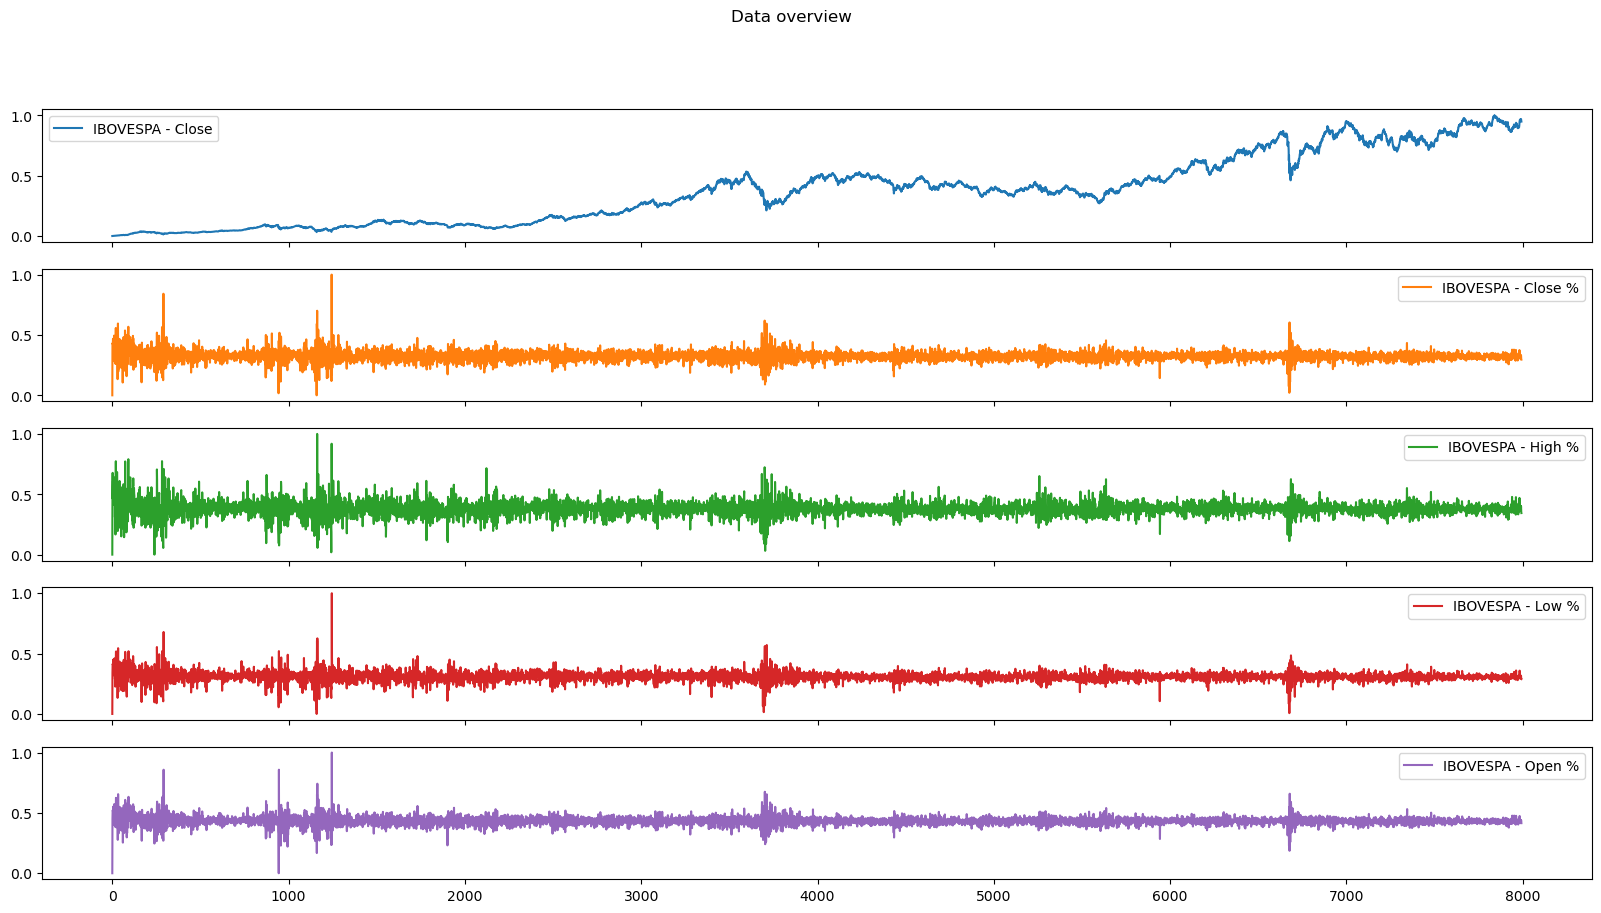

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

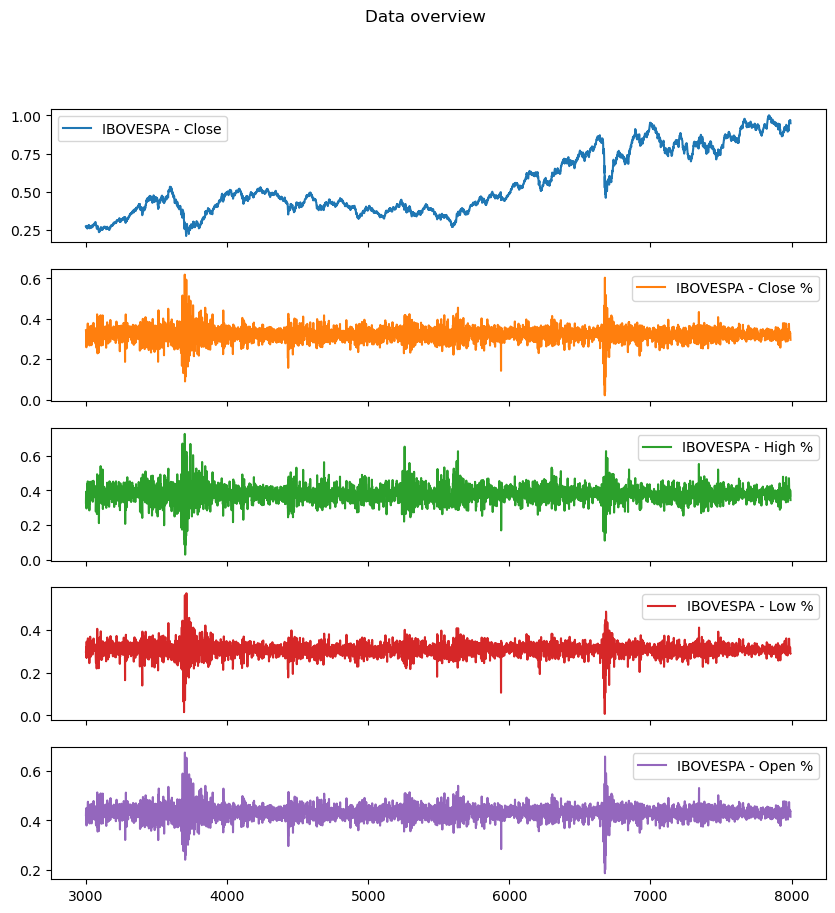

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

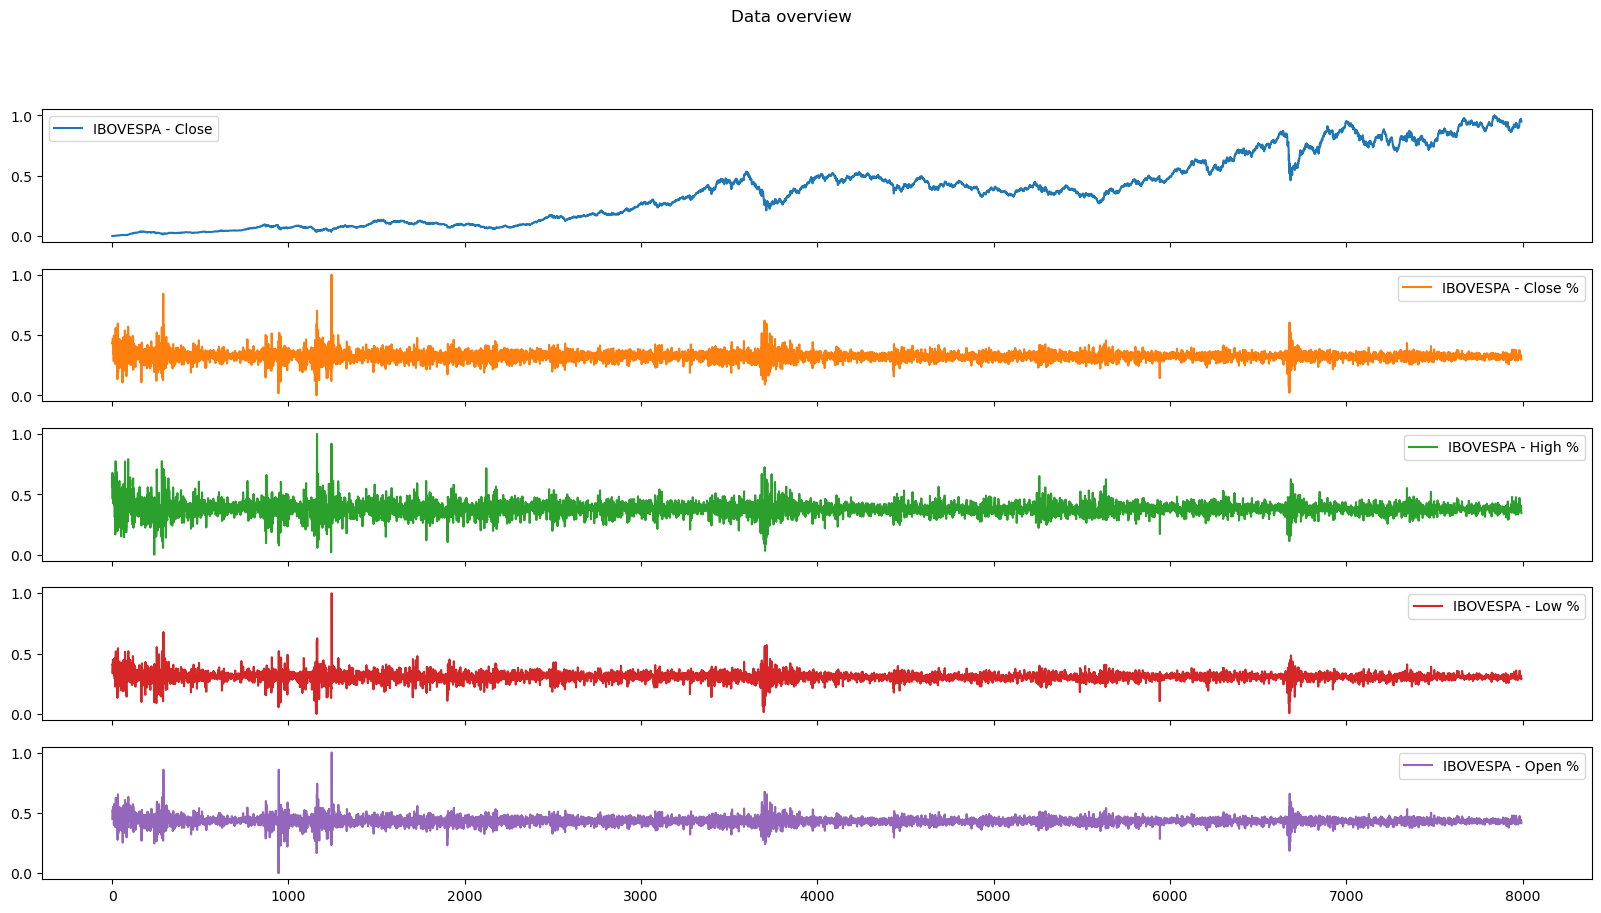

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

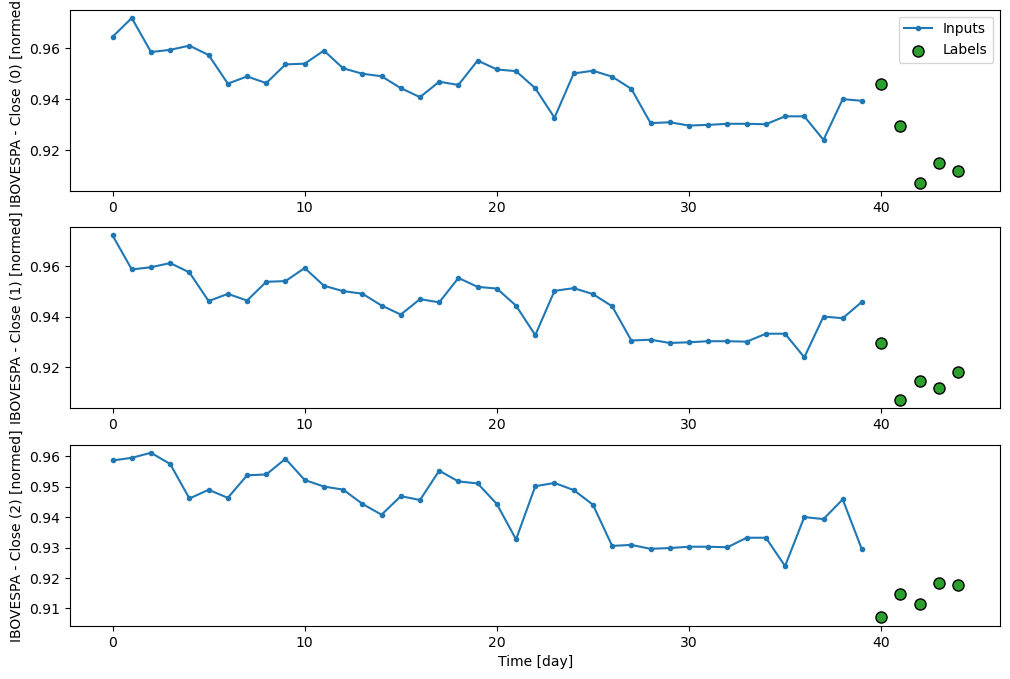

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

5

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 8:30 2s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 174.7767 - mean_squared_error: 6.0224e-04 - root_mean_squared_error: 0.0222

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 155.6934 - mean_squared_error: 5.7113e-04 - root_mean_squared_error: 0.0224

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 130.5260 - mean_squared_error: 4.9022e-04 - root_mean_squared_error: 0.0211

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 118.3632 - mean_squared_error: 4.4561e-04 - root_mean_squared_error: 0.0201

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 108.5837 - mean_squared_error: 4.0864e-04 - root_mean_squared_error: 0.0193

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 97.1644 - mean_squared_error: 3.6459e-04 - root_mean_squared_error: 0.0182 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 91.1755 - mean_squared_error: 3.4138e-04 - root_mean_squared_error: 0.0175

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 86.0415 - mean_squared_error: 3.2146e-04 - root_mean_squared_error: 0.0170

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 81.5618 - mean_squared_error: 3.0410e-04 - root_mean_squared_error: 0.0165

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 77.6343 - mean_squared_error: 2.8899e-04 - root_mean_squared_error: 0.0161

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 72.5902 - mean_squared_error: 2.7016e-04 - root_mean_squared_error: 0.0155

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 69.6713 - mean_squared_error: 2.5963e-04 - root_mean_squared_error: 0.0152

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 67.0420 - mean_squared_error: 2.5028e-04 - root_mean_squared_error: 0.0149

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 63.5814 - mean_squared_error: 2.3867e-04 - root_mean_squared_error: 0.0146

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 61.5702 - mean_squared_error: 2.3258e-04 - root_mean_squared_error: 0.0144

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 59.0315 - mean_squared_error: 2.2682e-04 - root_mean_squared_error: 0.0142

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 56.8744 - mean_squared_error: 2.2457e-04 - root_mean_squared_error: 0.0142

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 55.6216 - mean_squared_error: 2.2515e-04 - root_mean_squared_error: 0.0143

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 53.8761 - mean_squared_error: 2.2550e-04 - root_mean_squared_error: 0.0143

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 52.7948 - mean_squared_error: 2.2594e-04 - root_mean_squared_error: 0.0144

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 51.7858 - mean_squared_error: 2.2695e-04 - root_mean_squared_error: 0.0144

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 50.3759 - mean_squared_error: 2.2853e-04 - root_mean_squared_error: 0.0145

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.4907 - mean_squared_error: 2.2928e-04 - root_mean_squared_error: 0.0146

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 48.6597 - mean_squared_error: 2.3025e-04 - root_mean_squared_error: 0.0146

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.8751 - mean_squared_error: 2.3122e-04 - root_mean_squared_error: 0.0147

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.1335 - mean_squared_error: 2.3222e-04 - root_mean_squared_error: 0.0147

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.4383 - mean_squared_error: 2.3351e-04 - root_mean_squared_error: 0.0148

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.4613 - mean_squared_error: 2.3526e-04 - root_mean_squared_error: 0.0149

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.5672 - mean_squared_error: 2.3694e-04 - root_mean_squared_error: 0.0149

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.9970 - mean_squared_error: 2.3779e-04 - root_mean_squared_error: 0.0150

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.4578 - mean_squared_error: 2.3880e-04 - root_mean_squared_error: 0.0150

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.9523 - mean_squared_error: 2.4054e-04 - root_mean_squared_error: 0.0151

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 42.4833 - mean_squared_error: 2.4440e-04 - root_mean_squared_error: 0.0152

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.0422 - mean_squared_error: 2.4958e-04 - root_mean_squared_error: 0.0153

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 41.4021 - mean_squared_error: 2.5670e-04 - root_mean_squared_error: 0.0156

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 40.9870 - mean_squared_error: 2.6092e-04 - root_mean_squared_error: 0.0157

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 40.5812 - mean_squared_error: 2.6480e-04 - root_mean_squared_error: 0.0158

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 40.1883 - mean_squared_error: 2.6862e-04 - root_mean_squared_error: 0.0159

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 39.8070 - mean_squared_error: 2.7232e-04 - root_mean_squared_error: 0.0160

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 39.2591 - mean_squared_error: 2.7867e-04 - root_mean_squared_error: 0.0162

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 38.7423 - mean_squared_error: 2.8730e-04 - root_mean_squared_error: 0.0164

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 38.4079 - mean_squared_error: 2.9287e-04 - root_mean_squared_error: 0.0166

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 37.9196 - mean_squared_error: 3.0080e-04 - root_mean_squared_error: 0.0168

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 37.4458 - mean_squared_error: 3.0821e-04 - root_mean_squared_error: 0.0170

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 37.1389 - mean_squared_error: 3.1336e-04 - root_mean_squared_error: 0.0171

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 36.8382 - mean_squared_error: 3.1847e-04 - root_mean_squared_error: 0.0173

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 36.5434 - mean_squared_error: 3.2349e-04 - root_mean_squared_error: 0.0174

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 36.2545 - mean_squared_error: 3.2859e-04 - root_mean_squared_error: 0.0175

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 35.9742 - mean_squared_error: 3.3480e-04 - root_mean_squared_error: 0.0177

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 35.7134 - mean_squared_error: 3.4767e-04 - root_mean_squared_error: 0.0179

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 35.3443 - mean_squared_error: 3.7059e-04 - root_mean_squared_error: 0.0184

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 35.1080 - mean_squared_error: 3.8696e-04 - root_mean_squared_error: 0.0187

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 34.7756 - mean_squared_error: 4.2332e-04 - root_mean_squared_error: 0.0193

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 34.5696 - mean_squared_error: 4.5987e-04 - root_mean_squared_error: 0.0198

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 34.3737 - mean_squared_error: 5.0294e-04 - root_mean_squared_error: 0.0204

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 34.0903 - mean_squared_error: 5.6805e-04 - root_mean_squared_error: 0.0212

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 33.9044 - mean_squared_error: 6.0939e-04 - root_mean_squared_error: 0.0218

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 33.6278 - mean_squared_error: 6.6785e-04 - root_mean_squared_error: 0.0226

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 33.3576 - mean_squared_error: 7.2322e-04 - root_mean_squared_error: 0.0233

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 33.1805 - mean_squared_error: 7.5838e-04 - root_mean_squared_error: 0.0238

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 32.9213 - mean_squared_error: 8.0993e-04 - root_mean_squared_error: 0.0245

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 32.7509 - mean_squared_error: 8.4266e-04 - root_mean_squared_error: 0.0249

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 32.5819 - mean_squared_error: 8.7398e-04 - root_mean_squared_error: 0.0253

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 32.4144 - mean_squared_error: 9.0394e-04 - root_mean_squared_error: 0.0257

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 32.2493 - mean_squared_error: 9.3282e-04 - root_mean_squared_error: 0.0261

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 32.0084 - mean_squared_error: 9.7494e-04 - root_mean_squared_error: 0.0267

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 31.8497 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0271    

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 31.6923 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0274

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 31.5375 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0278

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 31.3862 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0281

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 31.2377 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0284

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 31.0905 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0287

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 30.9447 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 30.8010 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 30.6608 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0296

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 30.4579 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 30.3243 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 30.1934 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0306

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 30.0656 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0309

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 29.9410 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0312

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 29.8188 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 29.6989 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 29.5811 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0320

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 29.4648 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 29.3503 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0325

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 29.2385 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 29.1281 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 29.0187 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0333

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 28.9104 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0336

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 28.7497 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 28.6434 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 28.4918 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0346

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 28.3939 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 28.2973 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 28.1551 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0357

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 28.0626 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0360

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 27.9712 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 27.8803 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0367

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 27.7898 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0370

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 27.7002 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 27.5668 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0377

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 27.4345 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0381

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 27.3470 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 27.2178 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0388 - val_loss: 0.0935 - val_mean_absolute_error: 0.0935 - val_mean_absolute_percentage_error: 9.9220 - val_mean_squared_error: 0.0094 - val_root_mean_squared_error: 0.0971 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 41s 177ms/step - loss: 0.7082 - mean_absolute_error: 0.7082 - mean_absolute_percentage_error: 9408.2344 - mean_squared_error: 0.5018 - root_mean_squared_error: 0.7084

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7109 - mean_absolute_error: 0.7109 - mean_absolute_percentage_error: 7871.9893 - mean_squared_error: 0.5056 - root_mean_squared_error: 0.7111  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.7063 - mean_absolute_error: 0.7063 - mean_absolute_percentage_error: 6686.1836 - mean_squared_error: 0.4992 - root_mean_squared_error: 0.7065

  7/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.6983 - mean_absolute_error: 0.6983 - mean_absolute_percentage_error: 5922.3643 - mean_squared_error: 0.4885 - root_mean_squared_error: 0.6988

  8/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.6931 - mean_absolute_error: 0.6931 - mean_absolute_percentage_error: 5650.8735 - mean_squared_error: 0.4818 - root_mean_squared_error: 0.6939

  9/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.6872 - mean_absolute_error: 0.6872 - mean_absolute_percentage_error: 5421.2192 - mean_squared_error: 0.4743 - root_mean_squared_error: 0.6883

 11/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.6885 - mean_absolute_error: 0.6885 - mean_absolute_percentage_error: 5098.0190 - mean_squared_error: 0.5022 - root_mean_squared_error: 0.7045

 13/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.6926 - mean_absolute_error: 0.6926 - mean_absolute_percentage_error: 4860.7861 - mean_squared_error: 0.5442 - root_mean_squared_error: 0.7315 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.6924 - mean_absolute_error: 0.6924 - mean_absolute_percentage_error: 4655.2061 - mean_squared_error: 0.5670 - root_mean_squared_error: 0.7467

 17/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.6894 - mean_absolute_error: 0.6894 - mean_absolute_percentage_error: 4471.2666 - mean_squared_error: 0.5784 - root_mean_squared_error: 0.7547

 19/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.6799 - mean_absolute_error: 0.6799 - mean_absolute_percentage_error: 4292.2837 - mean_squared_error: 0.5798 - root_mean_squared_error: 0.7563

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.6670 - mean_absolute_error: 0.6670 - mean_absolute_percentage_error: 4122.3535 - mean_squared_error: 0.5755 - root_mean_squared_error: 0.7539

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.6526 - mean_absolute_error: 0.6526 - mean_absolute_percentage_error: 3963.4346 - mean_squared_error: 0.5679 - root_mean_squared_error: 0.7490

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.6386 - mean_absolute_error: 0.6386 - mean_absolute_percentage_error: 3817.0635 - mean_squared_error: 0.5588 - root_mean_squared_error: 0.7430

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.6253 - mean_absolute_error: 0.6253 - mean_absolute_percentage_error: 3681.9846 - mean_squared_error: 0.5488 - root_mean_squared_error: 0.7362

 28/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.6190 - mean_absolute_error: 0.6190 - mean_absolute_percentage_error: 3618.5581 - mean_squared_error: 0.5438 - root_mean_squared_error: 0.7328

 30/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.6069 - mean_absolute_error: 0.6069 - mean_absolute_percentage_error: 3498.9224 - mean_squared_error: 0.5335 - root_mean_squared_error: 0.7255

 32/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.5955 - mean_absolute_error: 0.5955 - mean_absolute_percentage_error: 3388.2080 - mean_squared_error: 0.5233 - root_mean_squared_error: 0.7182

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5843 - mean_absolute_error: 0.5843 - mean_absolute_percentage_error: 3285.0291 - mean_squared_error: 0.5130 - root_mean_squared_error: 0.7106

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5735 - mean_absolute_error: 0.5735 - mean_absolute_percentage_error: 3189.0181 - mean_squared_error: 0.5028 - root_mean_squared_error: 0.7031

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5631 - mean_absolute_error: 0.5631 - mean_absolute_percentage_error: 3099.1882 - mean_squared_error: 0.4928 - root_mean_squared_error: 0.6955

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5530 - mean_absolute_error: 0.5530 - mean_absolute_percentage_error: 3015.0923 - mean_squared_error: 0.4831 - root_mean_squared_error: 0.6880

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5432 - mean_absolute_error: 0.5432 - mean_absolute_percentage_error: 2935.9741 - mean_squared_error: 0.4736 - root_mean_squared_error: 0.6807

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5385 - mean_absolute_error: 0.5385 - mean_absolute_percentage_error: 2898.1606 - mean_squared_error: 0.4690 - root_mean_squared_error: 0.6770

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5292 - mean_absolute_error: 0.5292 - mean_absolute_percentage_error: 2825.7673 - mean_squared_error: 0.4599 - root_mean_squared_error: 0.6698

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5202 - mean_absolute_error: 0.5202 - mean_absolute_percentage_error: 2757.2756 - mean_squared_error: 0.4512 - root_mean_squared_error: 0.6628

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5115 - mean_absolute_error: 0.5115 - mean_absolute_percentage_error: 2692.3777 - mean_squared_error: 0.4427 - root_mean_squared_error: 0.6559

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5030 - mean_absolute_error: 0.5030 - mean_absolute_percentage_error: 2630.7871 - mean_squared_error: 0.4345 - root_mean_squared_error: 0.6491

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4947 - mean_absolute_error: 0.4947 - mean_absolute_percentage_error: 2572.2729 - mean_squared_error: 0.4266 - root_mean_squared_error: 0.6425

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4868 - mean_absolute_error: 0.4868 - mean_absolute_percentage_error: 2516.6064 - mean_squared_error: 0.4190 - root_mean_squared_error: 0.6361

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4790 - mean_absolute_error: 0.4790 - mean_absolute_percentage_error: 2463.5771 - mean_squared_error: 0.4117 - root_mean_squared_error: 0.6299

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4715 - mean_absolute_error: 0.4715 - mean_absolute_percentage_error: 2412.9954 - mean_squared_error: 0.4046 - root_mean_squared_error: 0.6237

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4643 - mean_absolute_error: 0.4643 - mean_absolute_percentage_error: 2364.7107 - mean_squared_error: 0.3977 - root_mean_squared_error: 0.6178

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4572 - mean_absolute_error: 0.4572 - mean_absolute_percentage_error: 2318.5649 - mean_squared_error: 0.3911 - root_mean_squared_error: 0.6120

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4504 - mean_absolute_error: 0.4504 - mean_absolute_percentage_error: 2274.4175 - mean_squared_error: 0.3847 - root_mean_squared_error: 0.6064

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4471 - mean_absolute_error: 0.4471 - mean_absolute_percentage_error: 2253.0535 - mean_squared_error: 0.3816 - root_mean_squared_error: 0.6036

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4406 - mean_absolute_error: 0.4406 - mean_absolute_percentage_error: 2211.6763 - mean_squared_error: 0.3755 - root_mean_squared_error: 0.5981

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4344 - mean_absolute_error: 0.4344 - mean_absolute_percentage_error: 2172.0054 - mean_squared_error: 0.3697 - root_mean_squared_error: 0.5929

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4313 - mean_absolute_error: 0.4313 - mean_absolute_percentage_error: 2152.7695 - mean_squared_error: 0.3668 - root_mean_squared_error: 0.5903

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4253 - mean_absolute_error: 0.4253 - mean_absolute_percentage_error: 2115.4341 - mean_squared_error: 0.3612 - root_mean_squared_error: 0.5852

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4195 - mean_absolute_error: 0.4195 - mean_absolute_percentage_error: 2079.5381 - mean_squared_error: 0.3559 - root_mean_squared_error: 0.5802

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.4139 - mean_absolute_error: 0.4139 - mean_absolute_percentage_error: 2045.0002 - mean_squared_error: 0.3506 - root_mean_squared_error: 0.5753

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.4085 - mean_absolute_error: 0.4085 - mean_absolute_percentage_error: 2011.7369 - mean_squared_error: 0.3456 - root_mean_squared_error: 0.5706

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.4032 - mean_absolute_error: 0.4032 - mean_absolute_percentage_error: 1979.6821 - mean_squared_error: 0.3407 - root_mean_squared_error: 0.5660

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3981 - mean_absolute_error: 0.3981 - mean_absolute_percentage_error: 1948.7637 - mean_squared_error: 0.3359 - root_mean_squared_error: 0.5615

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3931 - mean_absolute_error: 0.3931 - mean_absolute_percentage_error: 1918.9205 - mean_squared_error: 0.3313 - root_mean_squared_error: 0.5571

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3882 - mean_absolute_error: 0.3882 - mean_absolute_percentage_error: 1890.0946 - mean_squared_error: 0.3269 - root_mean_squared_error: 0.5528

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3859 - mean_absolute_error: 0.3859 - mean_absolute_percentage_error: 1876.0465 - mean_squared_error: 0.3247 - root_mean_squared_error: 0.5507

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3835 - mean_absolute_error: 0.3835 - mean_absolute_percentage_error: 1862.2334 - mean_squared_error: 0.3225 - root_mean_squared_error: 0.5486

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3790 - mean_absolute_error: 0.3790 - mean_absolute_percentage_error: 1835.2850 - mean_squared_error: 0.3183 - root_mean_squared_error: 0.5445

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3745 - mean_absolute_error: 0.3745 - mean_absolute_percentage_error: 1809.2050 - mean_squared_error: 0.3142 - root_mean_squared_error: 0.5405

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3702 - mean_absolute_error: 0.3702 - mean_absolute_percentage_error: 1783.9491 - mean_squared_error: 0.3103 - root_mean_squared_error: 0.5366

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3681 - mean_absolute_error: 0.3681 - mean_absolute_percentage_error: 1771.6190 - mean_squared_error: 0.3083 - root_mean_squared_error: 0.5347

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3660 - mean_absolute_error: 0.3660 - mean_absolute_percentage_error: 1759.4814 - mean_squared_error: 0.3064 - root_mean_squared_error: 0.5327

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3640 - mean_absolute_error: 0.3640 - mean_absolute_percentage_error: 1747.5314 - mean_squared_error: 0.3045 - root_mean_squared_error: 0.5309

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3599 - mean_absolute_error: 0.3599 - mean_absolute_percentage_error: 1724.1731 - mean_squared_error: 0.3008 - root_mean_squared_error: 0.5272

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3560 - mean_absolute_error: 0.3560 - mean_absolute_percentage_error: 1701.5114 - mean_squared_error: 0.2972 - root_mean_squared_error: 0.5235

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3503 - mean_absolute_error: 0.3503 - mean_absolute_percentage_error: 1668.7567 - mean_squared_error: 0.2920 - root_mean_squared_error: 0.5182

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3467 - mean_absolute_error: 0.3467 - mean_absolute_percentage_error: 1647.7000 - mean_squared_error: 0.2886 - root_mean_squared_error: 0.5148

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 1627.2349 - mean_squared_error: 0.2853 - root_mean_squared_error: 0.5114

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3396 - mean_absolute_error: 0.3396 - mean_absolute_percentage_error: 1607.3374 - mean_squared_error: 0.2821 - root_mean_squared_error: 0.5081

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3346 - mean_absolute_error: 0.3346 - mean_absolute_percentage_error: 1578.5037 - mean_squared_error: 0.2775 - root_mean_squared_error: 0.5033

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3314 - mean_absolute_error: 0.3314 - mean_absolute_percentage_error: 1559.9382 - mean_squared_error: 0.2745 - root_mean_squared_error: 0.5002

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1541.8713 - mean_squared_error: 0.2716 - root_mean_squared_error: 0.4971

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3238 - mean_absolute_error: 0.3238 - mean_absolute_percentage_error: 1515.6453 - mean_squared_error: 0.2673 - root_mean_squared_error: 0.4926

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3209 - mean_absolute_error: 0.3209 - mean_absolute_percentage_error: 1498.7190 - mean_squared_error: 0.2646 - root_mean_squared_error: 0.4897

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3181 - mean_absolute_error: 0.3181 - mean_absolute_percentage_error: 1482.2211 - mean_squared_error: 0.2619 - root_mean_squared_error: 0.4869

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3153 - mean_absolute_error: 0.3153 - mean_absolute_percentage_error: 1466.1335 - mean_squared_error: 0.2593 - root_mean_squared_error: 0.4841

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3127 - mean_absolute_error: 0.3127 - mean_absolute_percentage_error: 1450.4366 - mean_squared_error: 0.2567 - root_mean_squared_error: 0.4813

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - mean_absolute_percentage_error: 1442.7294 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4800

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 1427.5880 - mean_squared_error: 0.2530 - root_mean_squared_error: 0.4773

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1412.8013 - mean_squared_error: 0.2506 - root_mean_squared_error: 0.4747

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1398.3568 - mean_squared_error: 0.2482 - root_mean_squared_error: 0.4721

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_absolute_percentage_error: 1384.2434 - mean_squared_error: 0.2459 - root_mean_squared_error: 0.4696

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2990 - mean_absolute_error: 0.2990 - mean_absolute_percentage_error: 1370.4493 - mean_squared_error: 0.2436 - root_mean_squared_error: 0.4671

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2967 - mean_absolute_error: 0.2967 - mean_absolute_percentage_error: 1356.9624 - mean_squared_error: 0.2414 - root_mean_squared_error: 0.4647

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2956 - mean_absolute_error: 0.2956 - mean_absolute_percentage_error: 1350.3314 - mean_squared_error: 0.2403 - root_mean_squared_error: 0.4635

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2934 - mean_absolute_error: 0.2934 - mean_absolute_percentage_error: 1337.2866 - mean_squared_error: 0.2382 - root_mean_squared_error: 0.4611

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2912 - mean_absolute_error: 0.2912 - mean_absolute_percentage_error: 1324.5233 - mean_squared_error: 0.2361 - root_mean_squared_error: 0.4587

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1312.0316 - mean_squared_error: 0.2340 - root_mean_squared_error: 0.4564

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2869 - mean_absolute_error: 0.2869 - mean_absolute_percentage_error: 1299.8022 - mean_squared_error: 0.2320 - root_mean_squared_error: 0.4542

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2848 - mean_absolute_error: 0.2848 - mean_absolute_percentage_error: 1287.8289 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4519

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2828 - mean_absolute_error: 0.2828 - mean_absolute_percentage_error: 1276.1045 - mean_squared_error: 0.2281 - root_mean_squared_error: 0.4497

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1264.6193 - mean_squared_error: 0.2262 - root_mean_squared_error: 0.4476

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2798 - mean_absolute_error: 0.2798 - mean_absolute_percentage_error: 1258.9644 - mean_squared_error: 0.2252 - root_mean_squared_error: 0.4465

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 1247.8241 - mean_squared_error: 0.2234 - root_mean_squared_error: 0.4444

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2760 - mean_absolute_error: 0.2760 - mean_absolute_percentage_error: 1236.9037 - mean_squared_error: 0.2215 - root_mean_squared_error: 0.4423

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2741 - mean_absolute_error: 0.2741 - mean_absolute_percentage_error: 1226.1978 - mean_squared_error: 0.2197 - root_mean_squared_error: 0.4402

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1215.6982 - mean_squared_error: 0.2180 - root_mean_squared_error: 0.4382

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1205.3990 - mean_squared_error: 0.2163 - root_mean_squared_error: 0.4362

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2687 - mean_absolute_error: 0.2687 - mean_absolute_percentage_error: 1195.2943 - mean_squared_error: 0.2146 - root_mean_squared_error: 0.4343

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1185.3793 - mean_squared_error: 0.2129 - root_mean_squared_error: 0.4323

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1170.8525 - mean_squared_error: 0.2105 - root_mean_squared_error: 0.4295

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 1156.7217 - mean_squared_error: 0.2081 - root_mean_squared_error: 0.4267

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2603 - mean_absolute_error: 0.2603 - mean_absolute_percentage_error: 1147.5134 - mean_squared_error: 0.2066 - root_mean_squared_error: 0.4248

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 1134.0087 - mean_squared_error: 0.2043 - root_mean_squared_error: 0.4221

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2556 - mean_absolute_error: 0.2556 - mean_absolute_percentage_error: 1120.8594 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4195

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2541 - mean_absolute_error: 0.2541 - mean_absolute_percentage_error: 1112.2831 - mean_squared_error: 0.2006 - root_mean_squared_error: 0.4178

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2519 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 1099.6932 - mean_squared_error: 0.1985 - root_mean_squared_error: 0.4152

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1091.4772 - mean_squared_error: 0.1971 - root_mean_squared_error: 0.4135

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2491 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 1083.3981 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4119

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 1075.4523 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4103

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 1067.6361 - mean_squared_error: 0.1931 - root_mean_squared_error: 0.4086

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1056.1479 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4063

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1044.9332 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.4039

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1037.6038 - mean_squared_error: 0.1879 - root_mean_squared_error: 0.4024

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1026.8281 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.4001

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2372 - mean_absolute_error: 0.2372 - mean_absolute_percentage_error: 1016.3043 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.3979

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1009.4222 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.3965

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 999.2928 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.3944 

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mean_absolute_percentage_error: 992.6658 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3930

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 986.1367 - mean_squared_error: 0.1792 - root_mean_squared_error: 0.3916

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 979.7032 - mean_squared_error: 0.1781 - root_mean_squared_error: 0.3902

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 973.3632 - mean_squared_error: 0.1770 - root_mean_squared_error: 0.3889

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 964.0237 - mean_squared_error: 0.1755 - root_mean_squared_error: 0.3868

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 957.9081 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3855

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 948.8958 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3836

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 942.9925 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3823

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2234 - mean_absolute_error: 0.2234 - mean_absolute_percentage_error: 937.1823 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3810 - val_loss: 0.0885 - val_mean_absolute_error: 0.0885 - val_mean_absolute_percentage_error: 9.3880 - val_mean_squared_error: 0.0085 - val_root_mean_squared_error: 0.0922 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.6656 - mean_absolute_error: 0.6656 - mean_absolute_percentage_error: 8838.7910 - mean_squared_error: 0.4432 - root_mean_squared_error: 0.6657

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.6647 - mean_absolute_error: 0.6647 - mean_absolute_percentage_error: 7369.9365 - mean_squared_error: 0.4420 - root_mean_squared_error: 0.6649 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6591 - mean_absolute_error: 0.6591 - mean_absolute_percentage_error: 5867.2466 - mean_squared_error: 0.4347 - root_mean_squared_error: 0.6593

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6479 - mean_absolute_error: 0.6479 - mean_absolute_percentage_error: 5091.2700 - mean_squared_error: 0.4210 - root_mean_squared_error: 0.6486

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6363 - mean_absolute_error: 0.6363 - mean_absolute_percentage_error: 4739.6680 - mean_squared_error: 0.4079 - root_mean_squared_error: 0.6381

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6122 - mean_absolute_error: 0.6122 - mean_absolute_percentage_error: 4310.4102 - mean_squared_error: 0.3843 - root_mean_squared_error: 0.6182

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5929 - mean_absolute_error: 0.5929 - mean_absolute_percentage_error: 4065.5918 - mean_squared_error: 0.3678 - root_mean_squared_error: 0.6037

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5734 - mean_absolute_error: 0.5734 - mean_absolute_percentage_error: 3849.1067 - mean_squared_error: 0.3519 - root_mean_squared_error: 0.5893

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5453 - mean_absolute_error: 0.5453 - mean_absolute_percentage_error: 3567.9958 - mean_squared_error: 0.3300 - root_mean_squared_error: 0.5687

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5276 - mean_absolute_error: 0.5276 - mean_absolute_percentage_error: 3404.1919 - mean_squared_error: 0.3166 - root_mean_squared_error: 0.5558

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5026 - mean_absolute_error: 0.5026 - mean_absolute_percentage_error: 3186.9739 - mean_squared_error: 0.2985 - root_mean_squared_error: 0.5377

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4871 - mean_absolute_error: 0.4871 - mean_absolute_percentage_error: 3058.3677 - mean_squared_error: 0.2875 - root_mean_squared_error: 0.5265

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4725 - mean_absolute_error: 0.4725 - mean_absolute_percentage_error: 2940.8477 - mean_squared_error: 0.2773 - root_mean_squared_error: 0.5159

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4589 - mean_absolute_error: 0.4589 - mean_absolute_percentage_error: 2833.0605 - mean_squared_error: 0.2679 - root_mean_squared_error: 0.5059

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4460 - mean_absolute_error: 0.4460 - mean_absolute_percentage_error: 2733.7766 - mean_squared_error: 0.2591 - root_mean_squared_error: 0.4964

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4339 - mean_absolute_error: 0.4339 - mean_absolute_percentage_error: 2642.1230 - mean_squared_error: 0.2510 - root_mean_squared_error: 0.4875

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4225 - mean_absolute_error: 0.4225 - mean_absolute_percentage_error: 2557.2209 - mean_squared_error: 0.2434 - root_mean_squared_error: 0.4790

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4117 - mean_absolute_error: 0.4117 - mean_absolute_percentage_error: 2478.2874 - mean_squared_error: 0.2363 - root_mean_squared_error: 0.4709

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4016 - mean_absolute_error: 0.4016 - mean_absolute_percentage_error: 2404.6848 - mean_squared_error: 0.2296 - root_mean_squared_error: 0.4633

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3873 - mean_absolute_error: 0.3873 - mean_absolute_percentage_error: 2303.1204 - mean_squared_error: 0.2204 - root_mean_squared_error: 0.4525

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3743 - mean_absolute_error: 0.3743 - mean_absolute_percentage_error: 2210.8457 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4425

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3661 - mean_absolute_error: 0.3661 - mean_absolute_percentage_error: 2153.8804 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4362

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3547 - mean_absolute_error: 0.3547 - mean_absolute_percentage_error: 2074.4346 - mean_squared_error: 0.1993 - root_mean_squared_error: 0.4272

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3476 - mean_absolute_error: 0.3476 - mean_absolute_percentage_error: 2025.0764 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4215

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3408 - mean_absolute_error: 0.3408 - mean_absolute_percentage_error: 1978.3290 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4161

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3343 - mean_absolute_error: 0.3343 - mean_absolute_percentage_error: 1933.9832 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.4109

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3282 - mean_absolute_error: 0.3282 - mean_absolute_percentage_error: 1891.8660 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.4059

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 1832.4778 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3987

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3139 - mean_absolute_error: 0.3139 - mean_absolute_percentage_error: 1795.1968 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3941

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3060 - mean_absolute_error: 0.3060 - mean_absolute_percentage_error: 1742.4366 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.3876

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 1709.1814 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3834

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1677.3417 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3793

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1646.8191 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3754

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2872 - mean_absolute_error: 0.2872 - mean_absolute_percentage_error: 1617.5287 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3717

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2829 - mean_absolute_error: 0.2829 - mean_absolute_percentage_error: 1589.3975 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3680

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2788 - mean_absolute_error: 0.2788 - mean_absolute_percentage_error: 1562.3612 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3644

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1523.7059 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3593

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1499.1179 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3560

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2654 - mean_absolute_error: 0.2654 - mean_absolute_percentage_error: 1475.4148 - mean_squared_error: 0.1431 - root_mean_squared_error: 0.3528

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2602 - mean_absolute_error: 0.2602 - mean_absolute_percentage_error: 1441.4146 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3482

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1419.7157 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3452

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1388.5223 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3409

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2490 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 1368.5737 - mean_squared_error: 0.1330 - root_mean_squared_error: 0.3381

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2460 - mean_absolute_error: 0.2460 - mean_absolute_percentage_error: 1349.2615 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3354

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1321.4180 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3314

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 1303.5647 - mean_squared_error: 0.1268 - root_mean_squared_error: 0.3289

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 1277.7797 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3252

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1261.2194 - mean_squared_error: 0.1227 - root_mean_squared_error: 0.3228

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1237.2657 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3193

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 1214.3307 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3159

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1199.5764 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3137

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 1185.2238 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3116

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 1171.2615 - mean_squared_error: 0.1142 - root_mean_squared_error: 0.3096

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1157.6761 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3076

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 1144.4519 - mean_squared_error: 0.1117 - root_mean_squared_error: 0.3057

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 1131.5714 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.3039

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 1112.8579 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.3013

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 1100.7650 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.2996

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 1088.9650 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.2979

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 1071.7979 - mean_squared_error: 0.1050 - root_mean_squared_error: 0.2954

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2035 - mean_absolute_error: 0.2035 - mean_absolute_percentage_error: 1060.6968 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.2938

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 1044.5272 - mean_squared_error: 0.1025 - root_mean_squared_error: 0.2915

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1999 - mean_absolute_error: 0.1999 - mean_absolute_percentage_error: 1034.0527 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2900

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1986 - mean_absolute_error: 0.1986 - mean_absolute_percentage_error: 1023.8116 - mean_squared_error: 0.1006 - root_mean_squared_error: 0.2885

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 1013.7969 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.2871

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 1004.0015 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.2856

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1940 - mean_absolute_error: 0.1940 - mean_absolute_percentage_error: 989.7009 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.2835 

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 980.4177 - mean_squared_error: 0.0966 - root_mean_squared_error: 0.2821

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1909 - mean_absolute_error: 0.1909 - mean_absolute_percentage_error: 966.8537 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2801

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1897 - mean_absolute_error: 0.1897 - mean_absolute_percentage_error: 958.0422 - mean_squared_error: 0.0946 - root_mean_squared_error: 0.2788

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 949.4091 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2775

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 936.7814 - mean_squared_error: 0.0926 - root_mean_squared_error: 0.2756

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 928.5698 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2743

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 916.5499 - mean_squared_error: 0.0907 - root_mean_squared_error: 0.2724

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 908.7285 - mean_squared_error: 0.0900 - root_mean_squared_error: 0.2712

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1812 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 897.2736 - mean_squared_error: 0.0889 - root_mean_squared_error: 0.2694

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1797 - mean_absolute_error: 0.1797 - mean_absolute_percentage_error: 886.1409 - mean_squared_error: 0.0879 - root_mean_squared_error: 0.2677

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1786 - mean_absolute_error: 0.1786 - mean_absolute_percentage_error: 878.8920 - mean_squared_error: 0.0872 - root_mean_squared_error: 0.2665

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 868.2659 - mean_squared_error: 0.0862 - root_mean_squared_error: 0.2649

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1762 - mean_absolute_error: 0.1762 - mean_absolute_percentage_error: 861.3401 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2638

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 854.5369 - mean_squared_error: 0.0850 - root_mean_squared_error: 0.2627

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 847.8526 - mean_squared_error: 0.0843 - root_mean_squared_error: 0.2616

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1733 - mean_absolute_error: 0.1733 - mean_absolute_percentage_error: 841.2844 - mean_squared_error: 0.0837 - root_mean_squared_error: 0.2605

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1720 - mean_absolute_error: 0.1720 - mean_absolute_percentage_error: 831.6426 - mean_squared_error: 0.0828 - root_mean_squared_error: 0.2590

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 822.2446 - mean_squared_error: 0.0820 - root_mean_squared_error: 0.2574

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1697 - mean_absolute_error: 0.1697 - mean_absolute_percentage_error: 816.1104 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2564

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 810.0776 - mean_squared_error: 0.0808 - root_mean_squared_error: 0.2554

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1680 - mean_absolute_error: 0.1680 - mean_absolute_percentage_error: 804.1436 - mean_squared_error: 0.0803 - root_mean_squared_error: 0.2545

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 798.3055 - mean_squared_error: 0.0797 - root_mean_squared_error: 0.2535

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 792.5620 - mean_squared_error: 0.0792 - root_mean_squared_error: 0.2525

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1652 - mean_absolute_error: 0.1652 - mean_absolute_percentage_error: 784.1213 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2511

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1644 - mean_absolute_error: 0.1644 - mean_absolute_percentage_error: 778.6052 - mean_squared_error: 0.0779 - root_mean_squared_error: 0.2502

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1636 - mean_absolute_error: 0.1636 - mean_absolute_percentage_error: 773.1755 - mean_squared_error: 0.0774 - root_mean_squared_error: 0.2493

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1625 - mean_absolute_error: 0.1625 - mean_absolute_percentage_error: 765.1894 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2480

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1614 - mean_absolute_error: 0.1614 - mean_absolute_percentage_error: 757.3869 - mean_squared_error: 0.0759 - root_mean_squared_error: 0.2467

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1607 - mean_absolute_error: 0.1607 - mean_absolute_percentage_error: 752.2831 - mean_squared_error: 0.0754 - root_mean_squared_error: 0.2459

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1596 - mean_absolute_error: 0.1596 - mean_absolute_percentage_error: 744.7697 - mean_squared_error: 0.0747 - root_mean_squared_error: 0.2446

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1590 - mean_absolute_error: 0.1590 - mean_absolute_percentage_error: 739.8533 - mean_squared_error: 0.0743 - root_mean_squared_error: 0.2438

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 735.0087 - mean_squared_error: 0.0738 - root_mean_squared_error: 0.2430

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1573 - mean_absolute_error: 0.1573 - mean_absolute_percentage_error: 727.8727 - mean_squared_error: 0.0732 - root_mean_squared_error: 0.2418

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1566 - mean_absolute_error: 0.1566 - mean_absolute_percentage_error: 723.2007 - mean_squared_error: 0.0727 - root_mean_squared_error: 0.2410

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - mean_absolute_percentage_error: 716.3251 - mean_squared_error: 0.0721 - root_mean_squared_error: 0.2398 - val_loss: 0.1019 - val_mean_absolute_error: 0.1019 - val_mean_absolute_percentage_error: 10.8295 - val_mean_squared_error: 0.0110 - val_root_mean_squared_error: 0.1048 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.4644 - mean_absolute_error: 0.4644 - mean_absolute_percentage_error: 6169.1533 - mean_squared_error: 0.2158 - root_mean_squared_error: 0.4645

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.4599 - mean_absolute_error: 0.4599 - mean_absolute_percentage_error: 4697.2368 - mean_squared_error: 0.2117 - root_mean_squared_error: 0.4601 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4529 - mean_absolute_error: 0.4529 - mean_absolute_percentage_error: 4067.3909 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4532

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4446 - mean_absolute_error: 0.4446 - mean_absolute_percentage_error: 3659.9390 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4453

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4301 - mean_absolute_error: 0.4301 - mean_absolute_percentage_error: 3254.5708 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.4320

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4126 - mean_absolute_error: 0.4126 - mean_absolute_percentage_error: 2951.7473 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.4169

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3992 - mean_absolute_error: 0.3992 - mean_absolute_percentage_error: 2781.2422 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.4065

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3790 - mean_absolute_error: 0.3790 - mean_absolute_percentage_error: 2561.2991 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3913

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3612 - mean_absolute_error: 0.3612 - mean_absolute_percentage_error: 2379.4451 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3777

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3507 - mean_absolute_error: 0.3507 - mean_absolute_percentage_error: 2274.3630 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3693

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3407 - mean_absolute_error: 0.3407 - mean_absolute_percentage_error: 2179.2876 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3614

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3312 - mean_absolute_error: 0.3312 - mean_absolute_percentage_error: 2092.5947 - mean_squared_error: 0.1303 - root_mean_squared_error: 0.3540

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3181 - mean_absolute_error: 0.3181 - mean_absolute_percentage_error: 1976.4457 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3437

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3101 - mean_absolute_error: 0.3101 - mean_absolute_percentage_error: 1907.0148 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3373

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1843.0901 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3313

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2921 - mean_absolute_error: 0.2921 - mean_absolute_percentage_error: 1756.1564 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.3229

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1703.2583 - mean_squared_error: 0.1075 - root_mean_squared_error: 0.3176

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 1630.5699 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.3102

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1564.7288 - mean_squared_error: 0.0991 - root_mean_squared_error: 0.3033

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2629 - mean_absolute_error: 0.2629 - mean_absolute_percentage_error: 1524.0991 - mean_squared_error: 0.0966 - root_mean_squared_error: 0.2990

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 1485.8081 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2949

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2531 - mean_absolute_error: 0.2531 - mean_absolute_percentage_error: 1449.6763 - mean_squared_error: 0.0921 - root_mean_squared_error: 0.2909

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1415.5278 - mean_squared_error: 0.0900 - root_mean_squared_error: 0.2871

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1367.6180 - mean_squared_error: 0.0871 - root_mean_squared_error: 0.2817

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1337.6711 - mean_squared_error: 0.0852 - root_mean_squared_error: 0.2783

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - mean_absolute_percentage_error: 1295.4707 - mean_squared_error: 0.0826 - root_mean_squared_error: 0.2734

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2285 - mean_absolute_error: 0.2285 - mean_absolute_percentage_error: 1268.9917 - mean_squared_error: 0.0810 - root_mean_squared_error: 0.2703

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1243.7286 - mean_squared_error: 0.0794 - root_mean_squared_error: 0.2672

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 1207.9573 - mean_squared_error: 0.0772 - root_mean_squared_error: 0.2629

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 1185.3865 - mean_squared_error: 0.0758 - root_mean_squared_error: 0.2602

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2120 - mean_absolute_error: 0.2120 - mean_absolute_percentage_error: 1153.2904 - mean_squared_error: 0.0737 - root_mean_squared_error: 0.2562

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 1123.1344 - mean_squared_error: 0.0719 - root_mean_squared_error: 0.2524

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 1104.0090 - mean_squared_error: 0.0707 - root_mean_squared_error: 0.2500

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2008 - mean_absolute_error: 0.2008 - mean_absolute_percentage_error: 1076.6776 - mean_squared_error: 0.0689 - root_mean_squared_error: 0.2465

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 1050.8428 - mean_squared_error: 0.0673 - root_mean_squared_error: 0.2431

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 1034.3845 - mean_squared_error: 0.0663 - root_mean_squared_error: 0.2409

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1909 - mean_absolute_error: 0.1909 - mean_absolute_percentage_error: 1010.7617 - mean_squared_error: 0.0648 - root_mean_squared_error: 0.2378

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1875 - mean_absolute_error: 0.1875 - mean_absolute_percentage_error: 988.3265 - mean_squared_error: 0.0634 - root_mean_squared_error: 0.2348 

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1853 - mean_absolute_error: 0.1853 - mean_absolute_percentage_error: 973.9861 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2329

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1822 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 953.3337 - mean_squared_error: 0.0612 - root_mean_squared_error: 0.2301

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 933.6454 - mean_squared_error: 0.0599 - root_mean_squared_error: 0.2274

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 921.0208 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2256

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 902.7885 - mean_squared_error: 0.0580 - root_mean_squared_error: 0.2231

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1725 - mean_absolute_error: 0.1725 - mean_absolute_percentage_error: 891.0783 - mean_squared_error: 0.0572 - root_mean_squared_error: 0.2214

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1707 - mean_absolute_error: 0.1707 - mean_absolute_percentage_error: 879.7053 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2198

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1681 - mean_absolute_error: 0.1681 - mean_absolute_percentage_error: 863.2465 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2175

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 852.6595 - mean_squared_error: 0.0548 - root_mean_squared_error: 0.2160

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1641 - mean_absolute_error: 0.1641 - mean_absolute_percentage_error: 837.3405 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2138

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - mean_absolute_percentage_error: 822.6385 - mean_squared_error: 0.0529 - root_mean_squared_error: 0.2117

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 813.1578 - mean_squared_error: 0.0523 - root_mean_squared_error: 0.2104

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 799.3973 - mean_squared_error: 0.0515 - root_mean_squared_error: 0.2084

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1564 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 786.1573 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2065

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1551 - mean_absolute_error: 0.1551 - mean_absolute_percentage_error: 777.6016 - mean_squared_error: 0.0501 - root_mean_squared_error: 0.2053

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1538 - mean_absolute_error: 0.1538 - mean_absolute_percentage_error: 769.2537 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2041

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 761.1060 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2029

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1514 - mean_absolute_error: 0.1514 - mean_absolute_percentage_error: 753.1506 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.2017

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1503 - mean_absolute_error: 0.1503 - mean_absolute_percentage_error: 745.3806 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.2006

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 737.7891 - mean_squared_error: 0.0477 - root_mean_squared_error: 0.1995

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 730.3715 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.1984

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1469 - mean_absolute_error: 0.1469 - mean_absolute_percentage_error: 723.1205 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.1973

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1453 - mean_absolute_error: 0.1453 - mean_absolute_percentage_error: 712.5426 - mean_squared_error: 0.0461 - root_mean_squared_error: 0.1957

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - mean_absolute_percentage_error: 702.3065 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.1942

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 695.6660 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.1932

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - mean_absolute_percentage_error: 685.9700 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.1917

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1404 - mean_absolute_error: 0.1404 - mean_absolute_percentage_error: 679.6743 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.1908

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 673.5078 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.1898

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - mean_absolute_percentage_error: 664.4922 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.1884

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1372 - mean_absolute_error: 0.1372 - mean_absolute_percentage_error: 658.6328 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1875

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 650.0582 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1862

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 644.4799 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1854

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1339 - mean_absolute_error: 0.1339 - mean_absolute_percentage_error: 636.3141 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.1841

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1327 - mean_absolute_error: 0.1327 - mean_absolute_percentage_error: 628.3834 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1828

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 623.2189 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1820

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 615.6501 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1808

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 610.7197 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1801

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 605.8785 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1793

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 598.7776 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1782

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 594.1475 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1775

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 587.3518 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1764

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 582.9180 - mean_squared_error: 0.0380 - root_mean_squared_error: 0.1757

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 578.5591 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1750

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 574.2728 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1743

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 570.0568 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1736

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 565.9096 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1729

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 559.8137 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1720

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 555.8315 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1713

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 549.9800 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1704

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 546.1562 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1698

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 542.3917 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1692

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 538.6850 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1686

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 535.0349 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1680

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1186 - mean_absolute_error: 0.1186 - mean_absolute_percentage_error: 531.4399 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1674

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 527.8990 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1669

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 522.6857 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1661

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 519.2739 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1655

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 515.9116 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1650

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 510.9587 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1642

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 506.1111 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1634

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 502.9420 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1629 - val_loss: 0.0362 - val_mean_absolute_error: 0.0362 - val_mean_absolute_percentage_error: 3.8188 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0415 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.5946 - mean_absolute_error: 0.5946 - mean_absolute_percentage_error: 7893.7490 - mean_squared_error: 0.3536 - root_mean_squared_error: 0.5947

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5885 - mean_absolute_error: 0.5885 - mean_absolute_percentage_error: 6011.7549 - mean_squared_error: 0.3465 - root_mean_squared_error: 0.5886 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5799 - mean_absolute_error: 0.5799 - mean_absolute_percentage_error: 4933.5859 - mean_squared_error: 0.3367 - root_mean_squared_error: 0.5802

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5738 - mean_absolute_error: 0.5738 - mean_absolute_percentage_error: 4528.9111 - mean_squared_error: 0.3299 - root_mean_squared_error: 0.5742

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5628 - mean_absolute_error: 0.5628 - mean_absolute_percentage_error: 4101.7275 - mean_squared_error: 0.3183 - root_mean_squared_error: 0.5637

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5542 - mean_absolute_error: 0.5542 - mean_absolute_percentage_error: 3879.1514 - mean_squared_error: 0.3097 - root_mean_squared_error: 0.5557

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5446 - mean_absolute_error: 0.5446 - mean_absolute_percentage_error: 3686.8857 - mean_squared_error: 0.3006 - root_mean_squared_error: 0.5472

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5284 - mean_absolute_error: 0.5284 - mean_absolute_percentage_error: 3436.4636 - mean_squared_error: 0.2865 - root_mean_squared_error: 0.5333

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5162 - mean_absolute_error: 0.5162 - mean_absolute_percentage_error: 3287.6416 - mean_squared_error: 0.2770 - root_mean_squared_error: 0.5237

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4971 - mean_absolute_error: 0.4971 - mean_absolute_percentage_error: 3086.7610 - mean_squared_error: 0.2633 - root_mean_squared_error: 0.5094

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4849 - mean_absolute_error: 0.4849 - mean_absolute_percentage_error: 2967.0532 - mean_squared_error: 0.2548 - root_mean_squared_error: 0.5002

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4734 - mean_absolute_error: 0.4734 - mean_absolute_percentage_error: 2857.3296 - mean_squared_error: 0.2467 - root_mean_squared_error: 0.4914

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4570 - mean_absolute_error: 0.4570 - mean_absolute_percentage_error: 2708.7849 - mean_squared_error: 0.2356 - root_mean_squared_error: 0.4790

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4464 - mean_absolute_error: 0.4464 - mean_absolute_percentage_error: 2618.7366 - mean_squared_error: 0.2287 - root_mean_squared_error: 0.4711

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4363 - mean_absolute_error: 0.4363 - mean_absolute_percentage_error: 2535.1438 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4635

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4266 - mean_absolute_error: 0.4266 - mean_absolute_percentage_error: 2457.6265 - mean_squared_error: 0.2160 - root_mean_squared_error: 0.4562

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4131 - mean_absolute_error: 0.4131 - mean_absolute_percentage_error: 2351.2048 - mean_squared_error: 0.2075 - root_mean_squared_error: 0.4460

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4004 - mean_absolute_error: 0.4004 - mean_absolute_percentage_error: 2254.6292 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4364

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3923 - mean_absolute_error: 0.3923 - mean_absolute_percentage_error: 2195.0422 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4303

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3809 - mean_absolute_error: 0.3809 - mean_absolute_percentage_error: 2112.0784 - mean_squared_error: 0.1879 - root_mean_squared_error: 0.4216

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3702 - mean_absolute_error: 0.3702 - mean_absolute_percentage_error: 2035.8848 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.4134

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3634 - mean_absolute_error: 0.3634 - mean_absolute_percentage_error: 1988.4474 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.4082

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3569 - mean_absolute_error: 0.3569 - mean_absolute_percentage_error: 1943.4563 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.4032

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3506 - mean_absolute_error: 0.3506 - mean_absolute_percentage_error: 1900.7168 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3984

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3446 - mean_absolute_error: 0.3446 - mean_absolute_percentage_error: 1860.0494 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3938

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3388 - mean_absolute_error: 0.3388 - mean_absolute_percentage_error: 1821.3153 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3893

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3333 - mean_absolute_error: 0.3333 - mean_absolute_percentage_error: 1784.3827 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3850

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3253 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 1732.0743 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3788

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3178 - mean_absolute_error: 0.3178 - mean_absolute_percentage_error: 1683.1581 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3729

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3130 - mean_absolute_error: 0.3130 - mean_absolute_percentage_error: 1652.2552 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3691

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3060 - mean_absolute_error: 0.3060 - mean_absolute_percentage_error: 1608.2456 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3636

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2995 - mean_absolute_error: 0.2995 - mean_absolute_percentage_error: 1566.8232 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3584

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2953 - mean_absolute_error: 0.2953 - mean_absolute_percentage_error: 1540.5247 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3551

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1502.9081 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3502

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1467.3147 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3456

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1444.6255 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3426

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2746 - mean_absolute_error: 0.2746 - mean_absolute_percentage_error: 1412.0403 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3382

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2695 - mean_absolute_error: 0.2695 - mean_absolute_percentage_error: 1381.0696 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3341

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1361.2585 - mean_squared_error: 0.1235 - root_mean_squared_error: 0.3314

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1332.7147 - mean_squared_error: 0.1210 - root_mean_squared_error: 0.3275

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1305.4889 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3237

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1288.0240 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3213

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2497 - mean_absolute_error: 0.2497 - mean_absolute_percentage_error: 1262.7916 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3177

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 1238.6476 - mean_squared_error: 0.1127 - root_mean_squared_error: 0.3143

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 1223.1206 - mean_squared_error: 0.1113 - root_mean_squared_error: 0.3120

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1200.6350 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.3088

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1179.0670 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.3057

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1165.1676 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.3036

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1145.0016 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.3007

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1125.6123 - mean_squared_error: 0.1027 - root_mean_squared_error: 0.2978

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2243 - mean_absolute_error: 0.2243 - mean_absolute_percentage_error: 1113.0920 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.2959

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1094.8905 - mean_squared_error: 0.0999 - root_mean_squared_error: 0.2932

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1083.1246 - mean_squared_error: 0.0989 - root_mean_squared_error: 0.2914

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 1071.6393 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.2897

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1054.9156 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2871

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 1044.0885 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2854

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 1033.5081 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.2838

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 1023.1658 - mean_squared_error: 0.0936 - root_mean_squared_error: 0.2822

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 1013.0533 - mean_squared_error: 0.0927 - root_mean_squared_error: 0.2806

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2056 - mean_absolute_error: 0.2056 - mean_absolute_percentage_error: 1003.1627 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2791

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 993.4863 - mean_squared_error: 0.0909 - root_mean_squared_error: 0.2776 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - mean_absolute_percentage_error: 984.0169 - mean_squared_error: 0.0901 - root_mean_squared_error: 0.2761

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 974.7479 - mean_squared_error: 0.0892 - root_mean_squared_error: 0.2746

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 961.2061 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2724

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 952.4099 - mean_squared_error: 0.0872 - root_mean_squared_error: 0.2710

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1946 - mean_absolute_error: 0.1946 - mean_absolute_percentage_error: 939.5487 - mean_squared_error: 0.0861 - root_mean_squared_error: 0.2689

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1932 - mean_absolute_error: 0.1932 - mean_absolute_percentage_error: 931.1885 - mean_squared_error: 0.0853 - root_mean_squared_error: 0.2676

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1917 - mean_absolute_error: 0.1917 - mean_absolute_percentage_error: 922.9939 - mean_squared_error: 0.0846 - root_mean_squared_error: 0.2663

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 911.0016 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2643

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 903.1987 - mean_squared_error: 0.0828 - root_mean_squared_error: 0.2630

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 891.7708 - mean_squared_error: 0.0818 - root_mean_squared_error: 0.2611

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1843 - mean_absolute_error: 0.1843 - mean_absolute_percentage_error: 880.6623 - mean_squared_error: 0.0808 - root_mean_squared_error: 0.2593

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - mean_absolute_percentage_error: 873.4279 - mean_squared_error: 0.0802 - root_mean_squared_error: 0.2581

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 862.8228 - mean_squared_error: 0.0792 - root_mean_squared_error: 0.2563

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1793 - mean_absolute_error: 0.1793 - mean_absolute_percentage_error: 852.5022 - mean_squared_error: 0.0783 - root_mean_squared_error: 0.2545

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1781 - mean_absolute_error: 0.1781 - mean_absolute_percentage_error: 845.7742 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2534

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 835.9020 - mean_squared_error: 0.0768 - root_mean_squared_error: 0.2517

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 829.4628 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2506

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1741 - mean_absolute_error: 0.1741 - mean_absolute_percentage_error: 823.1337 - mean_squared_error: 0.0756 - root_mean_squared_error: 0.2495

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1724 - mean_absolute_error: 0.1724 - mean_absolute_percentage_error: 813.8409 - mean_squared_error: 0.0748 - root_mean_squared_error: 0.2479

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1714 - mean_absolute_error: 0.1714 - mean_absolute_percentage_error: 807.7750 - mean_squared_error: 0.0743 - root_mean_squared_error: 0.2469

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1698 - mean_absolute_error: 0.1698 - mean_absolute_percentage_error: 798.8636 - mean_squared_error: 0.0735 - root_mean_squared_error: 0.2453

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 793.0438 - mean_squared_error: 0.0729 - root_mean_squared_error: 0.2443

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 787.3179 - mean_squared_error: 0.0724 - root_mean_squared_error: 0.2433

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1662 - mean_absolute_error: 0.1662 - mean_absolute_percentage_error: 778.9003 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2419

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 773.4008 - mean_squared_error: 0.0712 - root_mean_squared_error: 0.2409

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1638 - mean_absolute_error: 0.1638 - mean_absolute_percentage_error: 765.3124 - mean_squared_error: 0.0704 - root_mean_squared_error: 0.2395

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1625 - mean_absolute_error: 0.1625 - mean_absolute_percentage_error: 757.4119 - mean_squared_error: 0.0697 - root_mean_squared_error: 0.2381

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1616 - mean_absolute_error: 0.1616 - mean_absolute_percentage_error: 752.2461 - mean_squared_error: 0.0693 - root_mean_squared_error: 0.2372

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1602 - mean_absolute_error: 0.1602 - mean_absolute_percentage_error: 744.6439 - mean_squared_error: 0.0686 - root_mean_squared_error: 0.2358

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1590 - mean_absolute_error: 0.1590 - mean_absolute_percentage_error: 737.2124 - mean_squared_error: 0.0679 - root_mean_squared_error: 0.2345

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1581 - mean_absolute_error: 0.1581 - mean_absolute_percentage_error: 732.3497 - mean_squared_error: 0.0675 - root_mean_squared_error: 0.2337

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1573 - mean_absolute_error: 0.1573 - mean_absolute_percentage_error: 727.5581 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2328

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1565 - mean_absolute_error: 0.1565 - mean_absolute_percentage_error: 722.8364 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2320

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - mean_absolute_percentage_error: 718.1830 - mean_squared_error: 0.0662 - root_mean_squared_error: 0.2311

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1549 - mean_absolute_error: 0.1549 - mean_absolute_percentage_error: 713.5959 - mean_squared_error: 0.0658 - root_mean_squared_error: 0.2303

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1538 - mean_absolute_error: 0.1538 - mean_absolute_percentage_error: 706.8392 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2291

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 704.6234 - mean_squared_error: 0.0650 - root_mean_squared_error: 0.2287 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245 - val_mean_absolute_percentage_error: 2.6581 - val_mean_squared_error: 8.3055e-04 - val_root_mean_squared_error: 0.0288 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.3072 - mean_absolute_error: 0.3072 - mean_absolute_percentage_error: 4083.0930 - mean_squared_error: 0.0949 - root_mean_squared_error: 0.3081

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 3119.0845 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.3063 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 2697.0386 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.3005

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2887 - mean_absolute_error: 0.2887 - mean_absolute_percentage_error: 2316.8606 - mean_squared_error: 0.0847 - root_mean_squared_error: 0.2906

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2763 - mean_absolute_error: 0.2763 - mean_absolute_percentage_error: 2067.4585 - mean_squared_error: 0.0788 - root_mean_squared_error: 0.2797

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1932.3746 - mean_squared_error: 0.0748 - root_mean_squared_error: 0.2720

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2516 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 1761.6865 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2607

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1666.8994 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2539

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1584.1332 - mean_squared_error: 0.0631 - root_mean_squared_error: 0.2476

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1510.7172 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2418

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 1444.6169 - mean_squared_error: 0.0580 - root_mean_squared_error: 0.2364

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 1356.6840 - mean_squared_error: 0.0548 - root_mean_squared_error: 0.2289

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 1304.7080 - mean_squared_error: 0.0528 - root_mean_squared_error: 0.2243

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 1235.0870 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.2179

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 1173.7583 - mean_squared_error: 0.0479 - root_mean_squared_error: 0.2121

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1867 - mean_absolute_error: 0.1867 - mean_absolute_percentage_error: 1136.7572 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.2086

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1827 - mean_absolute_error: 0.1827 - mean_absolute_percentage_error: 1102.3860 - mean_squared_error: 0.0451 - root_mean_squared_error: 0.2052

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1788 - mean_absolute_error: 0.1788 - mean_absolute_percentage_error: 1070.3956 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.2019

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 1026.2913 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.1974

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1685 - mean_absolute_error: 0.1685 - mean_absolute_percentage_error: 986.1621 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1932 

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1654 - mean_absolute_error: 0.1654 - mean_absolute_percentage_error: 961.3474 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1905

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1610 - mean_absolute_error: 0.1610 - mean_absolute_percentage_error: 926.7347 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1868

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1570 - mean_absolute_error: 0.1570 - mean_absolute_percentage_error: 894.8837 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1832

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1544 - mean_absolute_error: 0.1544 - mean_absolute_percentage_error: 874.9992 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1810

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 847.0098 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1778

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 829.4696 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1757

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - mean_absolute_percentage_error: 812.7441 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1738

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 789.0891 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1709

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 774.1852 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1691

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - mean_absolute_percentage_error: 759.9135 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1674

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1369 - mean_absolute_error: 0.1369 - mean_absolute_percentage_error: 746.2390 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1657

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1350 - mean_absolute_error: 0.1350 - mean_absolute_percentage_error: 733.1237 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1641

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 714.4139 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1617

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1307 - mean_absolute_error: 0.1307 - mean_absolute_percentage_error: 702.5366 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1602

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 685.5457 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1580

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 674.7266 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1566

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 664.2881 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1553

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 649.2993 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1533

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 639.7247 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1520

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 625.9473 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1502

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 612.8284 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1484

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 604.4224 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1473

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 592.2924 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1456

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - mean_absolute_percentage_error: 584.5065 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1445

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 576.9489 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1435

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 566.0178 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1419

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1096 - mean_absolute_error: 0.1096 - mean_absolute_percentage_error: 558.9861 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1409

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_absolute_percentage_error: 548.8024 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1395

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1071 - mean_absolute_error: 0.1071 - mean_absolute_percentage_error: 542.2439 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1386

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 535.8608 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1376

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 526.6008 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1363

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 520.6260 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1354

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 511.9456 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1342

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 506.3382 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1334

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 500.8673 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1325

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 492.9061 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1314

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 487.7549 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1306

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 482.7239 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1298

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 477.8083 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1291

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 473.0046 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1284

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 468.3082 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1277

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 463.7155 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1270

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 457.0128 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1259

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 452.6637 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1253

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 448.4067 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1246

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 444.2387 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1240

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 440.1568 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1233

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 434.1893 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1224

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 430.3107 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1218

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 426.5094 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1212

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 422.7829 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1206

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 419.1288 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1200

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 413.7786 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1191

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 408.5796 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1183

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 405.1947 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1177

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 400.2346 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1169

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 397.0030 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1164

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 393.8296 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1159

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 389.1749 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1151

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 386.1398 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1146

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 381.6856 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1139

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 377.3456 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1131

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 374.5133 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1127

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 370.3533 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1120

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 366.2956 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1113

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 363.6453 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1108

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 361.0376 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1104

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 358.4722 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1100

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 354.6999 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1093

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 352.2343 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1089

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 349.8070 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1085

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 346.2356 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1079

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 343.9003 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1075

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 340.4637 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1070

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 338.2150 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1066

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 335.9996 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1062

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 332.7372 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1057

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 330.6015 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1053

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 327.4547 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1048

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 325.3974 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1044 - val_loss: 0.0379 - val_mean_absolute_error: 0.0379 - val_mean_absolute_percentage_error: 4.0113 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0418 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 3166.6470 - mean_squared_error: 0.0573 - root_mean_squared_error: 0.2394

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 2399.8020 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2342 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 2064.3826 - mean_squared_error: 0.0517 - root_mean_squared_error: 0.2272

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 1841.9830 - mean_squared_error: 0.0487 - root_mean_squared_error: 0.2201

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 1681.3862 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.2131

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2011 - mean_absolute_error: 0.2011 - mean_absolute_percentage_error: 1551.2999 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.2061

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1878 - mean_absolute_error: 0.1878 - mean_absolute_percentage_error: 1392.4431 - mean_squared_error: 0.0393 - root_mean_squared_error: 0.1959

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1801 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 1306.9587 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1899

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 1234.0161 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1846

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1676 - mean_absolute_error: 0.1676 - mean_absolute_percentage_error: 1170.7001 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1798

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1597 - mean_absolute_error: 0.1597 - mean_absolute_percentage_error: 1088.9019 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1732

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1525 - mean_absolute_error: 0.1525 - mean_absolute_percentage_error: 1018.9595 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1673

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1481 - mean_absolute_error: 0.1481 - mean_absolute_percentage_error: 977.8300 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1637 

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1422 - mean_absolute_error: 0.1422 - mean_absolute_percentage_error: 923.1087 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1588

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - mean_absolute_percentage_error: 890.4495 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1558

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 860.4473 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1530

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 819.7341 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1490

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - mean_absolute_percentage_error: 795.0517 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1466

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 761.1793 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1432

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 740.3949 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1411

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - mean_absolute_percentage_error: 720.8699 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1391

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 702.5036 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1371

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 685.2034 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1353

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 661.0509 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1327

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 646.0071 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1310

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 631.7280 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1294

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 618.1643 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1279

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 599.0439 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1257

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 581.2549 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1237

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 570.0717 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1223

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 554.1969 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1204

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 539.3177 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1186

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 529.9072 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1175

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 520.8672 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1164

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 512.1752 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1153

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 503.8115 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1143

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 495.7538 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1133

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 487.9832 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1123

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 476.8320 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1108

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 469.7153 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1099

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 459.4823 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1086

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 452.9381 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1077

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 446.6047 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1069

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 437.4721 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1057

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 431.6157 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1049

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 423.1587 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1038

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 415.0693 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1027

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 409.8677 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1019

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 402.3409 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1009

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 395.1310 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0999

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 390.4861 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0993

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 383.7499 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0984

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 379.4067 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0978

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 375.1750 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0973

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 369.0238 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0964

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 365.0483 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0959

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 359.2638 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0951

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 355.5209 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0946

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 351.8650 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0941

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 346.5390 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0934

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 343.0895 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0929

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 338.0579 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0922

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 334.7948 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0917

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 330.0315 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0911

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 325.4195 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0904

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 322.4248 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0900

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 318.0475 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0893

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 313.8024 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0887

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 311.0429 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0883

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 308.3386 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0879

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 305.6871 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0875

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 303.0869 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0872

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 299.2788 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0866

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 296.8001 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0862

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 294.3687 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0859

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 291.9837 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0855

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 288.4900 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0850

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 286.2141 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0847

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 283.9786 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0844

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 280.6983 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0839

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 278.5583 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0836

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 275.4174 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0831

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 272.3560 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0827

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 270.3575 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0824

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 268.3920 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0821

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 266.4588 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0819

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 263.6172 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0815

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 260.8463 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0811

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 259.0368 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0809

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 256.3761 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0805

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 254.6362 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0803

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 252.9231 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0801

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 250.4016 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0798

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 248.7520 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0796

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 246.3228 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0793

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 243.9465 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0790

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 241.6213 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0787

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 240.0986 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0785

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 237.8575 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0782 - val_loss: 0.0346 - val_mean_absolute_error: 0.0346 - val_mean_absolute_percentage_error: 3.6505 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0392 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.3460 - mean_absolute_error: 0.3460 - mean_absolute_percentage_error: 4600.9072 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3464

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 3508.8669 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3435 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3351 - mean_absolute_error: 0.3351 - mean_absolute_percentage_error: 2869.8398 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3357

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3294 - mean_absolute_error: 0.3294 - mean_absolute_percentage_error: 2624.4712 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.3303

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3232 - mean_absolute_error: 0.3232 - mean_absolute_percentage_error: 2440.7068 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.3245

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3163 - mean_absolute_error: 0.3163 - mean_absolute_percentage_error: 2290.2078 - mean_squared_error: 0.1018 - root_mean_squared_error: 0.3183

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3087 - mean_absolute_error: 0.3087 - mean_absolute_percentage_error: 2161.7439 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.3117

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1995.3462 - mean_squared_error: 0.0920 - root_mean_squared_error: 0.3015

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1898.1138 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2948

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2784 - mean_absolute_error: 0.2784 - mean_absolute_percentage_error: 1811.1550 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2883

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1733.1089 - mean_squared_error: 0.0816 - root_mean_squared_error: 0.2823

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1662.5292 - mean_squared_error: 0.0787 - root_mean_squared_error: 0.2766

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2567 - mean_absolute_error: 0.2567 - mean_absolute_percentage_error: 1598.2527 - mean_squared_error: 0.0760 - root_mean_squared_error: 0.2713

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 1539.3884 - mean_squared_error: 0.0735 - root_mean_squared_error: 0.2663

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_absolute_percentage_error: 1459.5887 - mean_squared_error: 0.0700 - root_mean_squared_error: 0.2591

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1411.4241 - mean_squared_error: 0.0679 - root_mean_squared_error: 0.2547

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 1345.9318 - mean_squared_error: 0.0650 - root_mean_squared_error: 0.2485

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 1306.0370 - mean_squared_error: 0.0632 - root_mean_squared_error: 0.2446

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1250.9786 - mean_squared_error: 0.0607 - root_mean_squared_error: 0.2390

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 1200.9607 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2339

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 1170.0681 - mean_squared_error: 0.0570 - root_mean_squared_error: 0.2306

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2009 - mean_absolute_error: 0.2009 - mean_absolute_percentage_error: 1140.9229 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2275

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 1113.3868 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2245

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 1074.8188 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2202

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 1039.1639 - mean_squared_error: 0.0509 - root_mean_squared_error: 0.2162

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1836 - mean_absolute_error: 0.1836 - mean_absolute_percentage_error: 1016.8556 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2136

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 985.3697 - mean_squared_error: 0.0483 - root_mean_squared_error: 0.2100 

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1748 - mean_absolute_error: 0.1748 - mean_absolute_percentage_error: 956.0339 - mean_squared_error: 0.0470 - root_mean_squared_error: 0.2065

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1720 - mean_absolute_error: 0.1720 - mean_absolute_percentage_error: 937.5775 - mean_squared_error: 0.0461 - root_mean_squared_error: 0.2043

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1694 - mean_absolute_error: 0.1694 - mean_absolute_percentage_error: 919.9175 - mean_squared_error: 0.0452 - root_mean_squared_error: 0.2021

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1657 - mean_absolute_error: 0.1657 - mean_absolute_percentage_error: 894.8107 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.1990

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1633 - mean_absolute_error: 0.1633 - mean_absolute_percentage_error: 878.9293 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.1971

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1598 - mean_absolute_error: 0.1598 - mean_absolute_percentage_error: 856.2784 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1942

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1577 - mean_absolute_error: 0.1577 - mean_absolute_percentage_error: 841.9020 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.1924

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1555 - mean_absolute_error: 0.1555 - mean_absolute_percentage_error: 828.0695 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1906

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 - mean_absolute_percentage_error: 814.7453 - mean_squared_error: 0.0402 - root_mean_squared_error: 0.1889

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1506 - mean_absolute_error: 0.1506 - mean_absolute_percentage_error: 795.6442 - mean_squared_error: 0.0393 - root_mean_squared_error: 0.1864

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1478 - mean_absolute_error: 0.1478 - mean_absolute_percentage_error: 777.5312 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1840

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - mean_absolute_percentage_error: 765.9647 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1824

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - mean_absolute_percentage_error: 754.7798 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1809

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 743.9586 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1795

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 733.4822 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1781

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 718.3778 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1760

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1369 - mean_absolute_error: 0.1369 - mean_absolute_percentage_error: 708.6923 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1746

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1347 - mean_absolute_error: 0.1347 - mean_absolute_percentage_error: 694.7036 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1727

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1326 - mean_absolute_error: 0.1326 - mean_absolute_percentage_error: 681.3235 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1708

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1312 - mean_absolute_error: 0.1312 - mean_absolute_percentage_error: 672.7214 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1696

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 660.2676 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1678

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 648.3255 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1661

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 640.6312 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1650

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 629.4700 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1633

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 618.7399 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1618

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 611.8122 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1607

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 601.7434 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1592

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 595.2355 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1583

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 585.7648 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1568

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 576.6266 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1554

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1147 - mean_absolute_error: 0.1147 - mean_absolute_percentage_error: 570.7105 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1545

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 562.0877 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1532

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 553.7526 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1519

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 548.3481 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1511

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 540.4595 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1499

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 532.8214 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1487

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 527.8625 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1479

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 520.6150 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1467

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 515.9059 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1460

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 511.2913 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1452

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 504.5407 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1441

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 500.1504 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1434

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 493.7229 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1424

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 487.4779 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1414

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 483.4121 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1407

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 477.4542 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1397

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 473.5728 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1391

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 469.7615 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1384

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 464.1717 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1375

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 460.5272 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1369

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 456.9464 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1363

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 453.4274 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1357

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 449.9688 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1351

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 444.8907 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1342

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 441.5760 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1337

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 436.7064 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1328

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 431.9553 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1320

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 428.8515 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1315

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 425.7980 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1310

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 422.7929 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1304

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 418.3734 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1297

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 414.0567 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1289

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 411.2339 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1285

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 407.0805 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1277

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 404.3639 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1273

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 400.3642 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1266

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 397.7469 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1261

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 395.1679 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1257

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 391.3689 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1250

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 387.6519 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1244

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 386.4329 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1242 - val_loss: 0.0130 - val_mean_absolute_error: 0.0130 - val_mean_absolute_percentage_error: 1.3959 - val_mean_squared_error: 2.7627e-04 - val_root_mean_squared_error: 0.0166 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.2029 - mean_absolute_error: 0.2029 - mean_absolute_percentage_error: 2698.3799 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.2045

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 2247.5598 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.2037 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1929 - mean_absolute_error: 0.1929 - mean_absolute_percentage_error: 1764.7339 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1949

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1861 - mean_absolute_error: 0.1861 - mean_absolute_percentage_error: 1573.9620 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1887

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 1377.1033 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1795

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1635 - mean_absolute_error: 0.1635 - mean_absolute_percentage_error: 1228.5551 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1705

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1564 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 1149.0203 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1650

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 1052.0005 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1580

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 998.0709 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1539 

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 950.3013 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1501

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - mean_absolute_percentage_error: 907.3969 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1465

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 868.6494 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1432

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 817.3215 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1387

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 772.6970 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1346

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 745.9641 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1321

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 709.8353 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1287

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 687.9899 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1265

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 667.6977 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1245

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 648.7527 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1226

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 630.9955 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1208

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 614.3150 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1190

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 598.6319 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1173

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 583.8568 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1158

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 569.9051 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1142

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 550.3486 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1121

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 538.1464 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1107

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 520.9688 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1088

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 510.1964 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1075

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 499.9348 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1063

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 485.4233 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1046

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 476.2773 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1035

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 463.2935 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1019

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 451.1092 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1004

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 443.3864 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0995

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 432.3641 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0981

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 421.9556 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0968

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 415.3274 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0959

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 405.8183 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0947

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 396.7917 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0935

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 391.0223 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0928

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 382.7201 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0917

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 377.4039 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0910

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 369.7370 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0899

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 362.4158 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0889

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 357.7143 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0883

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 353.1494 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0877

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 348.7145 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0871

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 344.4042 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0865

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 338.1631 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0856

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 332.1746 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0848

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 328.3168 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0842

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 322.7206 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0835

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 319.1090 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0830

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 315.5880 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0825

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 310.4692 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0818

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 307.1600 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0813

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 302.3424 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0807

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 297.6923 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0800

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 294.6815 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0796

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 290.2928 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0790

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 286.0490 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0784

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 283.2964 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0780

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 279.2779 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0774

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 275.3863 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0768

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 272.8592 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0764

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 269.1651 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0759

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 265.5822 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0754

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 263.2535 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0750

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 259.8464 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0745

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 257.6300 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0742

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 255.4559 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0739

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 252.2719 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0734

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 250.1999 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0731

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 247.1660 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0726

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 245.1907 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0723

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 243.2516 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0720

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 241.3468 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0718

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 239.4754 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0715

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 236.7288 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0711

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 234.9372 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0708

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 233.1762 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0706

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 231.4448 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0703

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 229.7424 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0701

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 228.0684 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0698

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 226.4218 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0696

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 224.0014 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0693

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 222.4215 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0690

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 220.8677 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0688

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 219.3390 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0687

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 217.8340 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0685

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 215.6199 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0682

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 214.1720 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0680

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 212.7461 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0678

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 211.3415 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0677

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 209.2735 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0674

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 207.2507 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0672

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 205.9267 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0670

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 203.9758 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0668

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 202.0683 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0665 - val_loss: 0.0150 - val_mean_absolute_error: 0.0150 - val_mean_absolute_percentage_error: 1.5885 - val_mean_squared_error: 3.6769e-04 - val_root_mean_squared_error: 0.0192 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 4115.7461 - mean_squared_error: 0.0961 - root_mean_squared_error: 0.3100

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3086 - mean_absolute_error: 0.3086 - mean_absolute_percentage_error: 3428.5103 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.3089 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 2900.8088 - mean_squared_error: 0.0925 - root_mean_squared_error: 0.3041

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2956 - mean_absolute_error: 0.2956 - mean_absolute_percentage_error: 2440.9866 - mean_squared_error: 0.0879 - root_mean_squared_error: 0.2963

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2869 - mean_absolute_error: 0.2869 - mean_absolute_percentage_error: 2174.4482 - mean_squared_error: 0.0833 - root_mean_squared_error: 0.2882

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1978.5208 - mean_squared_error: 0.0785 - root_mean_squared_error: 0.2793

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2695 - mean_absolute_error: 0.2695 - mean_absolute_percentage_error: 1869.5640 - mean_squared_error: 0.0753 - root_mean_squared_error: 0.2731

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1772.0089 - mean_squared_error: 0.0721 - root_mean_squared_error: 0.2668

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 1684.5518 - mean_squared_error: 0.0691 - root_mean_squared_error: 0.2606

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1570.7961 - mean_squared_error: 0.0651 - root_mean_squared_error: 0.2520

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1473.7598 - mean_squared_error: 0.0615 - root_mean_squared_error: 0.2443

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1416.3728 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2395

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1339.1819 - mean_squared_error: 0.0564 - root_mean_squared_error: 0.2328

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 1292.7367 - mean_squared_error: 0.0546 - root_mean_squared_error: 0.2287

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 1249.8564 - mean_squared_error: 0.0530 - root_mean_squared_error: 0.2247

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2025 - mean_absolute_error: 0.2025 - mean_absolute_percentage_error: 1210.2723 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2209

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 1173.5295 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2174

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1916 - mean_absolute_error: 0.1916 - mean_absolute_percentage_error: 1122.9220 - mean_squared_error: 0.0479 - root_mean_squared_error: 0.2124

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1857 - mean_absolute_error: 0.1857 - mean_absolute_percentage_error: 1077.0582 - mean_squared_error: 0.0461 - root_mean_squared_error: 0.2077

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 1048.7820 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.2047

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 1009.3882 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.2005

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 984.9486 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.1979 

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1702 - mean_absolute_error: 0.1702 - mean_absolute_percentage_error: 961.8286 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.1953

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 939.9084 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1929

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1643 - mean_absolute_error: 0.1643 - mean_absolute_percentage_error: 919.0941 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1905

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1615 - mean_absolute_error: 0.1615 - mean_absolute_percentage_error: 899.3090 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1882

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1588 - mean_absolute_error: 0.1588 - mean_absolute_percentage_error: 880.4720 - mean_squared_error: 0.0380 - root_mean_squared_error: 0.1860

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1562 - mean_absolute_error: 0.1562 - mean_absolute_percentage_error: 862.5107 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1839

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 845.3755 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1819

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 829.0156 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1799

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - mean_absolute_percentage_error: 813.3635 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1780

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1468 - mean_absolute_error: 0.1468 - mean_absolute_percentage_error: 798.3745 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1762

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 784.0096 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1744

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1416 - mean_absolute_error: 0.1416 - mean_absolute_percentage_error: 763.5393 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1719

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 750.5541 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1702

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1368 - mean_absolute_error: 0.1368 - mean_absolute_percentage_error: 732.0007 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1679

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1342 - mean_absolute_error: 0.1342 - mean_absolute_percentage_error: 714.4630 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1656

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1325 - mean_absolute_error: 0.1325 - mean_absolute_percentage_error: 703.2903 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1641

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 687.2553 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1620

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 672.0248 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1600

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 662.2872 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1587

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1239 - mean_absolute_error: 0.1239 - mean_absolute_percentage_error: 648.2638 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1568

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 639.2812 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1555

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 630.5753 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1543

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 622.1323 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1532

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 613.9405 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1520

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 602.0986 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1504

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1154 - mean_absolute_error: 0.1154 - mean_absolute_percentage_error: 594.4858 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1493

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 583.4649 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1477

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 576.3718 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1467

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 569.4708 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1457

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 562.7542 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1447

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 556.2150 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1438

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 549.8452 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1428

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 543.6376 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1419

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 534.6172 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1406

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 528.7887 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1397

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 520.3088 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1385

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 514.8232 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1376

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 509.4662 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1368

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 504.2331 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1360

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 499.1194 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1353

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 491.6637 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1341

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 486.8306 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1334

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 479.7773 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1323

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 472.9496 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1312

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 468.5175 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1305

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 462.0413 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1295

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 455.7626 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1285

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 451.6819 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1278

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 445.7126 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1269

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 439.9176 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1259

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 436.1472 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1253

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 430.6252 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1244

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 427.0304 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1238

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 423.5022 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1233

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 420.0388 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1227

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 416.6384 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1221

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 411.6518 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1213

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 408.4010 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1208

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 403.6313 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1200

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 400.5202 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1194

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 397.4626 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1189

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 392.9731 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1181

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 390.0428 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1177

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 385.7378 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1169

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 381.5378 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1162

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 378.7940 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1157

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 376.0946 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1153

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 372.1254 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1146

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 369.5310 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1141

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 365.7148 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1135

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 361.9856 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1128

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 359.5468 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1124

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 355.9568 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1118

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 353.6077 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1114

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 351.2931 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1110

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 347.8840 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1104

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 345.6521 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1100

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 342.3648 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1094

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 341.2867 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1092 - val_loss: 0.0302 - val_mean_absolute_error: 0.0302 - val_mean_absolute_percentage_error: 3.2046 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0335 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1669 - mean_absolute_error: 0.1669 - mean_absolute_percentage_error: 2220.5764 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1687

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1632 - mean_absolute_error: 0.1632 - mean_absolute_percentage_error: 1684.0466 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1650 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1568 - mean_absolute_error: 0.1568 - mean_absolute_percentage_error: 1445.0573 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1590

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 1221.6466 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1503

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 1115.5760 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1446

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1325 - mean_absolute_error: 0.1325 - mean_absolute_percentage_error: 1028.0599 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1391

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 925.2117 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1321 

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 870.4648 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1281

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 802.0597 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1229

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 762.9537 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1198

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 727.9391 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1169

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 696.4294 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1142

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 667.9687 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1117

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 642.1505 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1094

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 618.5214 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1072

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 596.8419 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1052

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 576.9537 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1033

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 549.9356 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1006

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 533.5117 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0990

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 510.8806 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0967

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 496.9692 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0952

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 483.9024 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0939

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 471.6014 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0925

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 459.9999 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0913

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 443.7719 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0895

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 433.6603 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0884

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 419.4561 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0867

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 406.2766 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0852

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 398.0109 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0842

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 386.3235 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0829

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 378.9628 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0820

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 371.9230 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0811

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 361.9098 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0799

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 355.5690 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0791

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 346.5316 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0780

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 338.0120 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0769

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 332.5923 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0762

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 324.8250 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0752

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 322.3267 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0749

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 319.8715 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0746

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 315.0856 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0739

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 310.4591 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0733

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 305.9845 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0727

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 303.8015 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0725

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 301.6535 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0722

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 297.4596 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0716

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 293.3959 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0711

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 289.4558 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0705

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 285.6337 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0700

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 281.9243 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0695

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 278.3224 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0690

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 276.5601 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0688

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 273.1104 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0683

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 271.4227 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0681

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 268.1181 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0676

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 264.9035 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0672

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 261.7767 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0667

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 258.7343 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0663

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 255.7722 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0659

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 252.8860 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0655

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 250.0731 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0651

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 247.3308 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0647

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 245.9851 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0646

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 244.6560 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0644

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 242.0456 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0640

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 239.4972 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0637

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 237.0087 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0633

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 234.5779 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0630

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 232.2029 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0627

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 229.8818 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0623

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 227.6127 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0620

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 225.3935 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0617

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 223.2224 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0614

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 221.0979 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0611

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 219.0186 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0608

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 216.9828 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0605

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 214.9891 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0602

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 213.0363 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0599

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 211.1230 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0596

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 209.2483 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0593

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 207.4112 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0591

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 205.6099 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0588

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 203.8436 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0585

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 202.1110 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0583

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 200.4114 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0580

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 198.7443 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0578

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 197.9226 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0576

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 196.3023 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0574

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 194.7118 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0572

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 193.1499 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0569

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 192.3797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0568

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 191.6164 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0567

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 190.1100 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 188.6300 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 186.4583 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0559

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 185.0415 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0557

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 182.9614 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0554

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 180.9332 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0551

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 179.6089 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0548

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 177.6627 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0545

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 175.7640 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0543

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 174.5239 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0541

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 173.3033 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0539

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 172.1021 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0537

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 170.3356 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0535

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 169.1805 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0533

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 168.0435 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0531

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 166.9238 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0530

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 165.8208 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0528

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 164.7343 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0527

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 163.6640 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0525

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 162.6093 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0524

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 162.0877 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 161.0557 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0522

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 159.5368 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0520 - val_loss: 0.0148 - val_mean_absolute_error: 0.0148 - val_mean_absolute_percentage_error: 1.5691 - val_mean_squared_error: 3.3809e-04 - val_root_mean_squared_error: 0.0184 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 2866.5642 - mean_squared_error: 0.0468 - root_mean_squared_error: 0.2163

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2138 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 2381.0601 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.2144 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 2006.0831 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.2089

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2018 - mean_absolute_error: 0.2018 - mean_absolute_percentage_error: 1762.0579 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.2031

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 1598.2219 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1974

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1891 - mean_absolute_error: 0.1891 - mean_absolute_percentage_error: 1472.6306 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1916

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 1368.1930 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1858

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1745 - mean_absolute_error: 0.1745 - mean_absolute_percentage_error: 1278.1537 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1800

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1675 - mean_absolute_error: 0.1675 - mean_absolute_percentage_error: 1200.8794 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1747

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1613 - mean_absolute_error: 0.1613 - mean_absolute_percentage_error: 1134.4858 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1699

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 1050.6461 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1634

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1466 - mean_absolute_error: 0.1466 - mean_absolute_percentage_error: 980.4249 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1578 

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1424 - mean_absolute_error: 0.1424 - mean_absolute_percentage_error: 939.2283 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1543

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - mean_absolute_percentage_error: 884.3931 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1495

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1314 - mean_absolute_error: 0.1314 - mean_absolute_percentage_error: 836.6957 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1452

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 808.1822 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1426

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 769.6318 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1389

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - mean_absolute_percentage_error: 735.1432 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1355

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 714.1070 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1334

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 685.0668 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1305

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - mean_absolute_percentage_error: 658.6183 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1277

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 642.2455 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1260

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 619.3899 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1235

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 605.1639 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1220

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 591.6619 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1205

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 572.6599 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1183

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 560.7565 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1170

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 543.9341 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1150

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 533.3662 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1138

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 523.2612 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1126

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 513.5872 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1114

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 504.3216 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1103

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 495.4388 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1092

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 486.9109 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1082

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 474.7304 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1066

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 463.2304 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1052

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 455.9089 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1043

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 445.4054 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1029

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 435.4371 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1016

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 429.0673 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1008

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 419.9000 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0996

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 414.0326 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0988

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 408.3476 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0980

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 402.8370 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0973

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 397.4930 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0966

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 389.7715 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0955

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 384.8097 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0948

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 377.6300 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0939

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 370.7535 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0929

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 366.3284 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0923

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 359.9117 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0914

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 353.7491 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0906

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 349.7747 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0900

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 344.0007 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0893

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 340.2692 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0888

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 336.6283 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0883

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 333.0750 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0878

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 329.6059 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0873

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 324.5532 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0866

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 321.2812 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0861

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 316.5121 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0855

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 313.4206 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0850

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 310.3962 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0846

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 307.4372 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0842

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 304.5419 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0838

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 301.7081 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0834

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 298.9330 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0830

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 296.2147 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0826

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 293.5519 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0822

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 289.6586 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0816

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 287.1272 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0813

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 284.6452 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0809

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 282.2111 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0806

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 279.8236 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0802

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 276.3269 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0797

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 274.0505 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0793

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 270.7162 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0788

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 268.5447 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0785

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 266.4128 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0782

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 264.3186 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0779

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 262.2611 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0776

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 259.2414 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0771

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 257.2713 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0768

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 254.3787 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0764

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 251.5586 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0760

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 249.7175 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0757

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 247.9065 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0754

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 246.1248 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0751

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 244.3714 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0749

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 242.6469 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0746

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 240.9498 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0744

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 239.2791 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0741

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 236.8222 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0738

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 234.4221 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0734

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 233.6342 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0733

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 232.0766 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0731

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 229.7844 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0727

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 227.5428 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0724

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 226.0759 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0722

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 223.9152 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0719

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 221.8005 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0716

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 220.4180 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0714 - val_loss: 0.0182 - val_mean_absolute_error: 0.0182 - val_mean_absolute_percentage_error: 1.9731 - val_mean_squared_error: 4.7149e-04 - val_root_mean_squared_error: 0.0217 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 3130.0405 - mean_squared_error: 0.0557 - root_mean_squared_error: 0.2359

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 2389.6086 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2342 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1949.2042 - mean_squared_error: 0.0518 - root_mean_squared_error: 0.2274

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1776.6476 - mean_squared_error: 0.0497 - root_mean_squared_error: 0.2225

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 1589.2676 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.2148

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 1443.4586 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.2066

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1953 - mean_absolute_error: 0.1953 - mean_absolute_percentage_error: 1360.6262 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.2011

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 1288.1130 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1959

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1824 - mean_absolute_error: 0.1824 - mean_absolute_percentage_error: 1224.5511 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1912

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 1142.3124 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1847

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1670 - mean_absolute_error: 0.1670 - mean_absolute_percentage_error: 1071.8292 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1788

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1624 - mean_absolute_error: 0.1624 - mean_absolute_percentage_error: 1030.0139 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1752

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1562 - mean_absolute_error: 0.1562 - mean_absolute_percentage_error: 973.9710 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1702 

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1506 - mean_absolute_error: 0.1506 - mean_absolute_percentage_error: 924.6522 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1656

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1471 - mean_absolute_error: 0.1471 - mean_absolute_percentage_error: 894.9892 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1627

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1423 - mean_absolute_error: 0.1423 - mean_absolute_percentage_error: 854.4375 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1587

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - mean_absolute_percentage_error: 817.9282 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1551

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1350 - mean_absolute_error: 0.1350 - mean_absolute_percentage_error: 795.5266 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1527

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 764.4264 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1495

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 745.1926 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1474

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 727.0476 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1454

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 709.8963 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1435

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1218 - mean_absolute_error: 0.1218 - mean_absolute_percentage_error: 693.6414 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1417

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 678.2138 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1400

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 656.4940 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1375

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 636.3024 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1351

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 623.6212 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1336

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 611.5208 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1321

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 599.9455 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1307

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 583.5021 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1287

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 568.0709 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1268

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 558.2914 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1256

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 548.8903 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1244

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 539.8479 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1232

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 531.1397 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1221

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 518.6583 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1205

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 510.7012 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1194

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 499.2706 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1179

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 488.4034 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1165

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 481.4508 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1155

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 471.4313 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1142

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 461.8711 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1129

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 455.7370 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1120

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 446.8729 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1108

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 438.3894 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1096

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 432.9327 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1088

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 427.6278 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1081

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 422.4686 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1073

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 414.9880 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1062

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 407.8006 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1052

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 403.1626 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1045

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 396.4243 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1035

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 389.9348 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1026

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 385.7395 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1019

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 379.6333 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1010

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 375.6820 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1004

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 371.8222 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0999

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 366.1972 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0990

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 362.5523 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0984

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 357.2354 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0976

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 352.0904 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0968

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 348.7519 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0963

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 345.4837 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0958

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 342.2835 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0953

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 337.6060 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0946

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 334.5665 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0941

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 331.5878 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0936

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 328.6684 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0931

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 325.8060 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0927

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 322.9990 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0922

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 320.2457 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0918

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 316.2132 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0911

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 313.5877 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0907

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 309.7400 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0901

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 305.9967 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0895

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 302.3535 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0889

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 299.9782 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0885

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 296.4927 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0879

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 294.2190 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0875

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 291.9842 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0871

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 289.7872 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0868

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 287.6270 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0864

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 285.5026 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0860

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 283.4130 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0857

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 280.3419 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0852

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 278.3358 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0848

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 275.3866 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0843

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 272.5065 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0838

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 270.6238 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0835

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 268.7699 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0832

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 266.9443 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0829

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 264.2574 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0824

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 262.4997 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0821

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 259.9117 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0817

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 257.3802 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0812

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 255.7231 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0809

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 254.0898 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0807

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 251.6859 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0802 - val_loss: 0.0200 - val_mean_absolute_error: 0.0200 - val_mean_absolute_percentage_error: 2.1171 - val_mean_squared_error: 5.5913e-04 - val_root_mean_squared_error: 0.0236 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - mean_absolute_percentage_error: 1997.2505 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1513

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1472 - mean_absolute_error: 0.1472 - mean_absolute_percentage_error: 1517.7278 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1485 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1419 - mean_absolute_error: 0.1419 - mean_absolute_percentage_error: 1303.8448 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1435

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 1160.4662 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1385

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1304 - mean_absolute_error: 0.1304 - mean_absolute_percentage_error: 1055.5732 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1335

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 969.9044 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1286 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 868.2240 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1219

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 791.0245 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1164

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 748.6722 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1133

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 694.2797 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1090

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 662.6881 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1063

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 634.2292 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1039

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 596.5422 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1006

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 574.1774 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0986

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 544.0252 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0957

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 525.9404 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0940

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 509.2296 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0924

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 486.3430 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0901

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 472.3508 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0887

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 452.9997 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0866

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 441.0706 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0854

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 429.8335 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0842

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 419.2289 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0830

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 404.3956 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0813

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 395.1513 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0803

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 386.3817 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0793

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 378.0486 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0783

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 370.1179 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0774

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 358.9283 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0761

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 351.8956 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0752

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 341.9313 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0740

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 335.6432 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0733

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 329.6120 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0725

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 321.0142 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0715

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 315.5614 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0708

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 307.7673 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0698

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 302.8104 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0691

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 298.0320 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0685

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 293.4224 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0679

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 288.9715 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0673

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 284.6709 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0668

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 280.5130 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0662

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 274.5274 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0654

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 270.6945 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0649

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 266.9805 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0644

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 263.3798 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0639

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 258.1800 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0632

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 253.2074 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0625

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 250.0107 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0620

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 245.3845 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0614

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 240.9489 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0608

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 238.0913 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0604

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 235.3092 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0600

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 232.5996 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0596

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 229.9593 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0592

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 227.3859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 223.6451 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0583

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 220.0403 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0578

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 217.7089 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0574

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 214.3146 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0569

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 211.0375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0564

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 208.9149 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0561

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 205.8197 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0557

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 202.8258 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0552

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 200.8837 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0549

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 198.0477 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0545

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 195.3001 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0541

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 193.5155 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0538

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 190.9063 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0534

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 189.2106 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0531

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 187.5485 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0529

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 185.9188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0526

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 184.3206 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0524

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 182.7531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0521

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 181.2154 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0519

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 178.9627 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0515

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 177.4956 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0513

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 176.0553 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0511

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 174.6409 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0509

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 173.2519 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0506

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 171.2143 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0503

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 169.8855 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0501

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 168.5797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0499

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 167.2963 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0497

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 166.0347 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0495

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 164.7944 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0493

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 164.1821 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0492

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 163.5747 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0491

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 162.3751 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0489

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 161.1951 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0487

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 159.4610 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0484

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 157.7685 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0481

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 156.6625 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0480

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 155.5738 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0478

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 154.5019 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0476

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 153.4465 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0475

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 152.4072 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0473

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 151.3836 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0471

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 150.3754 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0470

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 148.8910 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0467

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 147.4392 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0465

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 146.4889 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0463

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 145.0895 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0461

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 144.6306 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0461 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 1.3044 - val_mean_squared_error: 2.4689e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 1667.3267 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1268

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 1264.5651 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1240 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 1083.9849 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1192

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 961.3343 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1144 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 - mean_absolute_percentage_error: 869.9611 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1097

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 795.8826 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1053

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 736.5259 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1014

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 688.1278 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0980

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 647.5172 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0951

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 612.3611 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0924

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 567.0885 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0888

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 540.9969 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0866

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 506.6139 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0836

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 486.3543 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0818

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 467.8779 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0801

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 450.9488 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0785

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 435.4176 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0770

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 421.1407 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0757

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 407.9189 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0743

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 395.6281 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0731

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 384.1559 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0719

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 373.4139 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0708

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 363.3365 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0697

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 353.8649 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0687

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 344.9382 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0677

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 336.5128 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0668

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 328.5460 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0659

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 321.0006 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0651

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 313.8486 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0643

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 307.0542 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0635

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 300.5905 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0627

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 294.4365 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0620

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 288.5720 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0613

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 280.2656 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0603

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 277.6197 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0600

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 275.0301 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0596

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 272.4949 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0593

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 270.0124 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0590

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 267.5807 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0587

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 262.8640 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 258.3328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0576

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 253.9758 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0570

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 249.7825 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0565

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 245.7438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0560

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 241.8516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0555

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 238.0969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0550

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 234.4726 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0545

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 230.9712 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0540

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 227.5870 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 224.3134 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0531

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 221.1447 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 218.0755 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0523

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 215.1010 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 212.2173 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0515

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 209.4197 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 206.7046 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 204.0680 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0504

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 201.5066 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 199.0182 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 196.5989 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0493

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 194.2453 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 191.9548 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0487

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 189.7247 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0484

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 187.5523 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 186.4870 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 185.4353 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0478

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 184.3971 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0476

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 183.3718 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0475

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 182.3593 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 181.3593 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 180.3717 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 179.3961 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0469

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 178.4323 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0468

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 177.4801 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 175.6099 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 173.7837 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 172.0000 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 170.2571 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0456

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 168.5536 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 166.8882 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 165.2594 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 163.6660 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0446

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 162.1069 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0444

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 160.5809 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 159.0869 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 157.6238 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0437

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 156.1906 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0435

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 154.7866 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 153.4109 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 152.7333 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 151.3981 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 150.0890 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0426

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 149.4440 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0425

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 148.8051 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0424

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 147.5459 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 146.3105 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 145.0983 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0418

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 143.9085 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 143.3218 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 142.7404 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0415

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 142.1644 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0414

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 141.5936 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0413

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 140.4673 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 139.3609 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 138.2740 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 137.2060 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 136.6789 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 136.1564 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0404

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 135.6384 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0404

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 135.1248 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0403

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 134.6156 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0402

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 134.1107 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 133.6101 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 133.1136 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 132.6213 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 131.6488 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 130.6922 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 129.7513 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0394

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 128.8258 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0393

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 128.3685 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0392

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 127.9149 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0391

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 127.4650 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 127.0186 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

215/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 126.5757 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 126.1362 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 125.7002 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 125.2675 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 124.8382 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 124.4122 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 123.5699 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 122.7405 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 122.3304 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 121.9234 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0382

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 121.5195 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0382

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 120.7206 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0381

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 119.9334 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 119.1577 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 118.0151 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 117.2682 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1015 - val_mean_squared_error: 1.6336e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - mean_absolute_percentage_error: 1586.4016 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1204

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 1314.7639 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1189 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 1101.9371 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1144

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 960.3610 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1095 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 859.9943 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1047

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 780.7695 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1002

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 717.6435 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0961

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 667.0978 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0927

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 625.3235 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0897

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 589.6041 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0871

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 573.4427 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0858

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 543.9901 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0835

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 517.8984 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0813

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 505.9075 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0803

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 483.7155 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0784

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 463.6468 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0766

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 445.4133 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0749

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 428.7454 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0734

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 413.4583 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0719

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 399.4499 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0706

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 386.5302 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0693

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 374.5529 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0681

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 363.4135 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0670

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 353.0025 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0659

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 343.2482 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0649

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 334.0976 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0639

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 325.4876 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0630

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 317.3679 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0621

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 306.0256 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0609

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 298.9645 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0601

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 292.2742 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0593

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 285.9185 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0586

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 279.8722 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0579

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 274.1167 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0572

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 268.6316 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0566

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 263.3951 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0559

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 258.3921 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0553

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 253.6020 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0547

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 249.0090 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0542

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 244.6012 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 240.3682 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0531

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 236.2988 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 232.3840 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 228.6138 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 224.9811 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 221.4775 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 218.0959 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 214.8297 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 211.6727 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 208.6199 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 205.6649 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 202.8032 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 200.0301 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 197.3417 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 194.7339 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 190.9655 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 188.5436 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 186.1910 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 183.9047 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 181.6812 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 179.5179 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 177.4120 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 174.3557 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 172.3833 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 170.4607 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0438

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 168.5858 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 166.7567 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 164.9718 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 163.2295 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 162.3740 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0427

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 161.5285 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 160.6929 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 159.8670 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 159.0507 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 158.2437 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 157.4460 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 156.6574 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0418

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 155.8775 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 155.1064 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 154.3438 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 152.8437 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 152.1059 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 150.6542 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 149.9400 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 148.5342 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 147.1577 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 145.8097 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 144.4892 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 143.1956 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 141.9281 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 141.3037 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 140.6855 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 140.0734 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0394

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 139.4672 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 138.2725 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 137.1008 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 135.9513 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 134.8234 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 133.7164 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 132.6297 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 131.5628 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 129.9981 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 128.9780 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 127.9758 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 126.9911 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 126.0233 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 125.0721 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0371

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 124.1370 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 123.2175 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 122.3133 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 121.4237 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 120.5488 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 119.6882 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 118.8413 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 118.0079 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0360

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 117.1875 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 116.3798 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 115.5846 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 114.8015 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 113.6490 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 112.8951 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 112.1524 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 111.4206 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 110.6995 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 109.6373 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 108.9429 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0362 - val_mean_squared_error: 1.5136e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 1608.2173 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1221

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - mean_absolute_percentage_error: 1331.5321 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1204 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 1116.3689 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1160

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 973.4655 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1112 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 872.4295 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1064

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 792.6709 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1019

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 728.7993 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0978

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 677.5822 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0943

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 616.6216 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0899

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 567.6099 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0862

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 539.6073 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0839

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 514.6597 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0818

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 492.2093 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0799

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 471.8794 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0781

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 444.7613 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0756

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 428.5841 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0741

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 406.7848 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0720

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 393.6714 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0707

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 381.5018 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0695

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 364.7938 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0678

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 354.5482 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0667

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 340.3608 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0652

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 331.6059 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0643

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 323.3498 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0634

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 311.8201 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0621

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 304.6422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0613

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 297.8431 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0605

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 291.3829 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0598

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 282.2719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0587

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 276.5543 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0580

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 271.0974 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0574

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 265.8838 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0567

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 260.8944 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0561

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 256.1135 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0556

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 251.5274 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 247.1253 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 242.8972 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0539

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 238.8302 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 234.9161 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0529

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 231.1452 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0524

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 227.5098 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 222.2933 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0513

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 218.9635 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 215.7451 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0504

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 212.6324 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 208.1490 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 205.2769 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 202.4930 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0486

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 201.1328 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 199.7932 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 198.4737 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 197.1738 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 195.8931 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0477

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 194.6311 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 192.1615 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 190.9532 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 189.7625 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0469

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 188.5887 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 186.2899 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 184.0539 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 181.8778 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0458

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 180.8114 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 178.7205 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 176.6835 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 174.6983 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 171.8131 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 169.9485 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 168.1289 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 165.4807 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 163.7671 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 162.0932 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 160.4576 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 158.8588 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0425

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 157.2956 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 155.7665 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 154.2706 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 152.8067 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 150.6685 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 149.2801 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 147.9202 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 145.9321 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 144.6400 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0404

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 142.7495 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 141.5198 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 140.3137 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 138.5477 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 137.3980 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0394

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 136.2696 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 135.1618 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 134.0742 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 133.0061 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 131.9571 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 130.4179 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 128.9188 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 127.9408 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 126.9795 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 126.5050 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 126.0344 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 125.1049 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 124.1907 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 123.2914 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 122.4070 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0371

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 121.5367 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 120.6803 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 119.8374 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 119.4209 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 119.0077 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 118.5976 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 118.1908 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 117.7870 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 117.3864 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 116.9887 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 116.5942 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 116.2026 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 115.8140 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 115.0455 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0360

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 114.6656 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 113.9141 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 113.5425 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 112.8074 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 112.0829 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 111.0169 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0323 - val_mean_squared_error: 1.4944e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 24s 105ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 1571.7627 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1190

  2/237 ━━━━━━━━━━━━━━━━━━━━ 29s 125ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 1440.5791 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1189

  3/237 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 1300.7788 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1174

  4/237 ━━━━━━━━━━━━━━━━━━━━ 44s 191ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 1184.6177 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1153

  5/237 ━━━━━━━━━━━━━━━━━━━━ 36s 159ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 1090.7100 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1130

  6/237 ━━━━━━━━━━━━━━━━━━━━ 31s 138ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 1014.3615 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1107

  8/237 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 898.2939 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1060 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 811.1862 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1015 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 774.1681 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0993

 13/237 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 711.6653 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0953

 14/237 ━━━━━━━━━━━━━━━━━━━━ 17s 77ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 685.3549 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0935

 15/237 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 661.5939 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0919

 16/237 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 640.0230 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0904

 17/237 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 620.2578 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0889

 18/237 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 601.9877 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0876

 19/237 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 584.9800 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0863

 21/237 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 554.0236 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0839

 23/237 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 526.6284 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0817

 24/237 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 514.0872 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0807

 25/237 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 502.2183 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0797

 26/237 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 490.9528 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0787

 27/237 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 480.2462 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0778

 29/237 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 460.3552 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0760

 31/237 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 442.2668 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 425.7331 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0728

 35/237 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 410.5627 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0714

 37/237 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 396.6515 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0701

 39/237 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 383.8112 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0688

 41/237 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 371.9086 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0676

 43/237 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 360.8377 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0665

 45/237 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 350.4914 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0654

 47/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 340.7983 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0644

 49/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 331.7054 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0634

 51/237 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 323.1494 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0625 

 53/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 315.0809 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0616

 55/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 307.4630 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0608

 57/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 300.2534 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0600

 59/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 293.4247 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0592

 61/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 286.9447 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0584

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 283.8270 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 280.7862 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0577

 65/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 274.9239 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0570

 66/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 272.0997 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0567

 68/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 266.6500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0561

 69/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 264.0185 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0558

 70/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 261.4470 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0554

 72/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 256.4766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0548

 74/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 251.7184 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0543

 76/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 247.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0537

 78/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 242.7783 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0532

 80/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 238.5743 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

 82/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 234.5329 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

 84/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 230.6455 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

 86/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 226.9020 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 223.2949 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 219.8162 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 216.4583 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 214.8227 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0496

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 213.2149 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 211.6342 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0492

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 210.0801 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 208.5518 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 207.0486 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 204.1143 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 201.2728 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0478

104/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 198.5193 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 197.1743 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 195.8499 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

107/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 194.5454 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0469

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 193.2605 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 190.7477 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

111/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 189.5189 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0462

113/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 187.1142 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 184.7783 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 182.5084 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 180.3009 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 178.1532 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 176.0626 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 174.0267 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 172.0433 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0438

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 170.1103 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 168.2258 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 166.3877 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 164.5943 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 162.8440 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 161.1354 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 159.4669 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 157.0362 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 155.4618 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 153.9226 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 152.4173 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 150.2205 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 148.7952 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 147.4000 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 146.0339 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 144.6961 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 143.3856 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 142.1018 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 140.8438 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 139.6106 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 138.4015 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 137.2158 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 136.0528 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 134.9120 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 134.3497 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 133.2408 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 132.1524 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 131.0839 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 130.0346 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 129.0042 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 127.9919 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 126.9974 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 126.0203 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 125.0600 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 124.1161 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 123.1882 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 122.2758 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 120.9353 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 120.0598 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 119.1988 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0360

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 118.3516 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 117.5179 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 116.6973 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 115.8896 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 114.7012 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 113.9241 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 113.1588 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 112.0324 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 111.2953 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 110.2100 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 109.1483 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 108.1105 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0318 - val_mean_squared_error: 1.5024e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 1581.2825 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1196

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 1308.4595 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1180 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 1097.5798 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1137

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 904.9644 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1069 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 818.1511 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1023

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 747.8477 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0981

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 691.6047 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0944

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 667.5840 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0927

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 645.7679 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0912

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 607.3113 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0884

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 574.0355 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0859

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 544.6414 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0835

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 518.5728 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0814

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 495.2406 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0794

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 474.1678 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0776

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 455.0493 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0758

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 437.6230 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0742

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 421.6628 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0727

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 407.0219 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0713

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 393.5623 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0700

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 375.2072 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0682

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 364.0327 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0670

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 348.6191 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0654

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 339.1449 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0644

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 330.2454 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0635

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 317.8488 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0621

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 310.1621 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0613

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 302.8879 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0605

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 295.9980 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0597

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 289.4608 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0589

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 280.2515 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0579

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 274.4788 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0572

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 266.3190 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0562

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 261.1844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0556

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 256.2730 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 251.5667 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 247.0519 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0539

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 242.7184 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0533

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 238.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 232.6056 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0520

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 228.8233 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 225.1789 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 221.6641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0506

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 218.2717 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 213.3981 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0496

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 210.2842 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 205.8015 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0485

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 201.5296 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 198.7912 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 194.8380 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 191.0590 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 188.6304 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0462

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 185.1171 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 182.8566 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 180.6580 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 177.4700 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0447

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 175.4142 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 172.4294 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 170.5024 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0437

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 168.6234 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 166.7904 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 165.0018 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 162.3987 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 160.7143 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 158.2605 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 155.8900 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 154.3535 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 152.1116 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 149.9419 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 148.5337 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 146.4762 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 145.1399 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 143.8308 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 142.5483 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 141.2914 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 140.0591 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 138.8508 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 137.6658 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 135.9306 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 134.8011 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 133.6925 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 132.6042 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 131.5358 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 130.4866 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 128.9476 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 127.9441 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 126.9582 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 125.9893 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0371

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 125.0369 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 124.1007 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 122.7255 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 121.8276 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 120.9443 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 119.6466 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 118.7987 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 117.9643 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 117.1429 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 116.3344 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 115.1447 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 114.3668 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 113.2218 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 112.1024 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 111.3698 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 110.2909 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 109.2356 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 108.8896 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0301 - val_mean_squared_error: 1.5020e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 1519.1339 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1150

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 1143.7096 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1112 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 979.3582 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1068 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 867.4520 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1023

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 783.5728 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0979

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 715.9351 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0938

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 662.0070 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0903

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 618.1081 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0872

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 581.2689 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0845

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 549.3647 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0821

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 521.1856 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0798

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 496.2069 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0778

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 473.8445 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0759

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 453.6481 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0741

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 435.3289 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0725

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 418.6264 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0709

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 403.3263 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0695

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 389.3003 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0682

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 376.4030 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0669

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 364.4637 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0657

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 358.8224 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0651

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 348.1281 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0641

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 338.1351 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0630

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 328.7740 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0620

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 319.9941 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0611

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 311.7341 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0602

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 307.7830 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0598

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 303.9458 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0594

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 300.2183 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0590

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 293.0695 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0582

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 289.6388 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0578

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 286.2996 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0574

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 283.0510 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0570

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 279.8864 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0567

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 273.7933 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0560

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 270.8595 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0556

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 267.9964 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0553

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 265.2028 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 262.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0546

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 259.8148 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0543

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 257.2141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

 69/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 254.6733 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0537

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 252.1902 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0534

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 249.7628 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0531

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 247.3886 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

 73/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 245.0650 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0526

 74/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 242.7906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0523

 75/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 240.5634 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0520

 76/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 238.3820 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

 77/237 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 236.2452 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

 79/237 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 232.1008 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0510

 81/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 228.1198 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

 82/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 226.1868 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

 83/237 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 224.2909 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

 84/237 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 222.4310 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

 86/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 218.8144 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

 88/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 215.3294 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

 90/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 211.9683 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

 92/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 208.7240 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0480

 94/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 205.5903 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

 96/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 202.5618 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 199.6330 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 196.7983 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

101/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 195.4148 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0462

103/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 192.7128 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 190.0940 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 188.8147 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 186.3136 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 183.8865 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

112/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 181.5300 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 178.1214 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 175.9294 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 173.7979 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 171.7241 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 169.7056 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

126/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 166.7763 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 163.9590 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 162.1396 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 159.4943 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 157.7841 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 156.1149 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 154.4852 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 152.8936 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 150.5744 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 149.0720 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 147.6030 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 146.1661 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 144.7605 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 143.3850 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 142.0386 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 140.7203 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 139.4293 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 138.1648 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 136.9260 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 135.7122 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 134.5224 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 133.3558 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 132.2118 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 130.5369 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 129.4468 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 127.8495 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 126.8091 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 125.7876 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 124.7845 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 123.7993 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 123.3132 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 122.3538 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 121.4112 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 120.4848 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 119.5743 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 118.2374 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 116.9336 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 116.0822 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 115.2447 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 114.4211 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 113.6105 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 112.8128 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 112.4187 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 112.0277 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 111.6397 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 111.2547 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 110.8727 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 110.4936 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 109.7442 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 109.0061 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 108.2792 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 107.5632 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0336

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 106.8577 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 106.1625 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 105.4775 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 104.8024 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 104.1380 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0570 - val_mean_squared_error: 1.5383e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 1461.0927 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1105

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - mean_absolute_percentage_error: 1100.7491 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1070 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 942.7923 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1028 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 835.0841 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0985

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 754.1738 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0942

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 688.9985 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0902

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 637.1466 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0868

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 594.9653 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0839

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 559.5539 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0813

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 528.8524 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0790

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 501.7390 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0768

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 477.7020 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0749

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 456.1652 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0730

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 427.6848 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0705

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 410.8443 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0690

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 402.9760 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0683

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 388.2310 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0669

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 374.7171 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0656

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 362.2738 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0644

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 350.7667 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0632

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 340.0987 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0621

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 335.0429 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0616

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 330.1550 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0611

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 320.8504 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0602

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 312.1299 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0592

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 303.9380 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0584

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 296.2202 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0575

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 288.9391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0567

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 282.0556 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0560

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 275.5378 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0552

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 269.3609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0545

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 263.4949 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 257.9157 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0532

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 252.6059 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0526

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 247.5482 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0520

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 242.7187 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 238.1052 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0508

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 233.6896 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 229.4559 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 225.3937 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 221.4932 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 217.7435 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 214.1366 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 210.6631 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 207.3161 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 204.0881 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 202.5164 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 200.9721 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 197.9622 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 195.0530 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 192.2395 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 189.5162 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 186.8789 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 184.3231 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 181.8455 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 179.4422 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 177.1100 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 174.8454 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 172.6456 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 170.5089 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 169.4630 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 167.4144 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 165.4211 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 163.4809 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 160.6651 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 158.8479 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 156.2076 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 154.5017 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 152.8372 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 151.2127 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 149.6269 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 148.0783 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 146.5656 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 144.3609 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 142.9323 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 141.5351 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 139.4961 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 138.1732 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 136.8783 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 135.6104 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 134.3687 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 133.1524 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 131.9609 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 130.7933 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 129.6487 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 128.5265 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 127.4261 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 125.8148 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 124.7661 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 123.2294 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 121.7349 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 120.7610 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 119.8045 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 118.8650 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 117.9418 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 116.5871 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 115.7034 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 114.8346 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 113.9805 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 112.7257 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 111.5016 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 110.7024 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 109.9160 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 109.1421 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 108.3805 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 107.6307 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 106.5277 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 105.8064 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 105.0960 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 104.3964 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 103.7071 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 103.0281 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 102.3590 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 101.6996 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 101.0498 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 100.4103 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0508 - val_mean_squared_error: 1.5641e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 1405.4009 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1067

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 1056.6498 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1030 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 904.1192 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0987 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 800.0308 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0945

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 721.9511 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0903

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 659.3964 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0865

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 609.7318 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0832

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 569.3683 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0804

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 520.3492 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0768

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 480.2095 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0736

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 457.2127 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0717

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 427.0634 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0692

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 409.3452 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0676

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 393.2269 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0661

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 378.4874 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0647

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 364.9691 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0635

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 352.5610 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0623

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 341.1022 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0611

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 330.4968 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0601

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 320.6385 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0591

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 311.4273 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0581

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 302.8001 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0572

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 294.7081 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0563

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 287.0937 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0555

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 279.9142 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0547

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 273.1353 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0540

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 266.7204 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0533

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 260.6439 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0526

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 254.8783 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 249.4005 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 244.1873 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0507

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 239.2271 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 234.4953 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 227.7929 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0487

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 223.5658 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 217.5488 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 211.8917 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 208.3032 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 203.1748 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 198.3263 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 195.2380 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 190.8047 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 186.5942 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 183.9026 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 181.2974 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 178.7744 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 175.1353 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 172.8011 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 170.5366 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 168.3384 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 166.2034 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 164.1297 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 162.1146 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 160.1551 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 158.2486 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 156.3928 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 154.5856 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 152.8250 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 150.2675 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 148.6154 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 147.0039 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 145.4312 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 143.1424 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 140.9338 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 139.5038 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 138.1063 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 136.7400 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 134.7467 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 133.4539 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 132.1887 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 130.9503 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 129.7378 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 128.5503 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 127.3871 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 126.2476 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 125.1310 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 124.0364 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 122.9632 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 121.9108 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 120.8786 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 119.8661 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 118.8726 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 117.8976 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 116.9405 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 116.0008 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 115.0780 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 114.1716 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 113.2812 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 112.4064 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 111.5467 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 110.7018 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 109.8713 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 109.0547 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 108.2517 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 107.4619 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 106.6849 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 105.9208 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 104.7975 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 103.7009 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 102.9840 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 102.2782 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 101.5833 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 100.5606 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 99.5610 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312 

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 98.9069 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 98.2624 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 97.6274 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 97.0016 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 96.0806 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0365 - val_mean_squared_error: 1.5054e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - mean_absolute_percentage_error: 1451.7638 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1096

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 1200.2952 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1079 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 936.7611 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1020 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 830.4667 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0979

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 717.1033 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0918

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 634.9933 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0865

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 592.9460 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0835

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 557.7141 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0810

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 527.2729 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0787

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 500.3621 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0766

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 476.4820 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0746

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 455.1222 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0728

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 435.8386 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0711

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 418.3337 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0696

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 402.3781 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0681

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 387.7737 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0668

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 368.0692 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0649

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 356.2054 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0637

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 345.1909 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0626

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 334.9325 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0616

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 325.3434 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0606

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 312.0784 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0592

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 303.9037 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0583

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 292.5161 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0571

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 285.4541 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0563

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 278.7708 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0555

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 269.3995 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0545

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 260.7241 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0535

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 255.2871 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0528

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 247.6079 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 242.7777 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 235.9270 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 231.5986 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0500

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 227.4463 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 221.5280 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0487

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 217.7737 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 212.4067 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 207.3322 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 204.0995 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 199.4593 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 195.0521 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 192.2350 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 188.1774 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 184.3089 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 181.8284 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 179.4224 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 177.0877 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 174.8207 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 172.6186 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 170.4798 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 167.3822 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 165.3870 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 162.4932 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 159.7114 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 157.9159 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 155.3064 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 152.7922 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 151.1664 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 148.7999 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 146.5158 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 145.0366 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 143.5907 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 142.8799 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 142.1770 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 140.7942 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 139.4415 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 138.1177 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 136.8220 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 135.5533 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 133.6992 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 132.4947 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 130.7334 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 129.5882 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 128.4654 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 127.3644 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 126.2845 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 125.2252 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 124.1858 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 123.1657 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 122.1643 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 121.1811 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 120.2156 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 119.2673 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 118.3356 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 117.4203 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 116.5208 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 115.6367 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 114.7677 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 113.9133 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 113.0731 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 112.2467 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 111.4338 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 110.6343 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 109.8477 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 109.0736 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 108.3117 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 107.5617 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 106.8233 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 105.7368 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 105.0263 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 104.3264 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0325

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 103.6370 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 102.6219 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 101.6290 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 100.6578 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 100.3393 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0358 - val_mean_squared_error: 1.5275e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 1386.7887 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1050

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 1145.4387 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1032 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 960.1951 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0994 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 837.4114 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 750.6849 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0912

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 682.0682 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0873

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 626.9098 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0838

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 582.5997 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0808

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 546.0032 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0782

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 514.8081 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0759

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 487.4752 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0737

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 463.2820 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0718

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 441.7325 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0700

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 422.3440 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0683

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 404.7922 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0667

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 388.8287 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0653

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 374.2383 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0639

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 360.8555 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0626

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 348.5786 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0614

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 331.8934 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0598

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 316.9821 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0583

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 307.8634 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0573

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 299.3235 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0564

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 291.3159 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0556

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 280.1810 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0544

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 273.2840 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0536

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 266.7666 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0529

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 260.5949 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0522

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 254.7497 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0515

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 249.1969 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 243.9144 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 238.8845 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 236.4594 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0494

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 231.7746 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 227.3004 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 223.0206 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 218.9199 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0473

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 214.9863 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 211.2115 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 209.3808 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 205.8254 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 200.7435 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 197.5111 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 194.3954 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 191.3890 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 188.4864 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 185.6818 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 182.9708 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 180.3480 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 177.8089 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 175.3494 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 172.9656 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 170.6543 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 168.4120 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 166.2355 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 164.1219 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 162.0690 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 160.0744 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 158.1348 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 156.2479 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 153.5111 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 150.8806 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 149.1827 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 147.5275 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 145.9132 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 144.3382 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 142.0464 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 140.5638 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 139.1159 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 137.7013 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 136.3189 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 134.9675 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 133.6459 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 132.3531 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 130.4661 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 129.2414 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 127.4521 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 126.2900 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 125.1516 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 124.0363 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 122.9431 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 121.8715 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 120.8208 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 119.7903 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 118.7796 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 117.7882 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 116.8152 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 115.8603 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 114.4605 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 113.5483 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 112.6524 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 111.7723 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 110.9076 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 110.0579 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 109.2229 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 108.4020 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 107.5950 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 106.8013 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 106.0207 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 105.2528 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 104.4977 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 103.7548 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 102.6624 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 101.9484 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0313

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 100.8982 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 100.2115 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 99.5353 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309 

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 98.8693 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 98.2133 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 97.2475 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 96.6155 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 95.9926 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 95.0755 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 94.7748 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0373 - val_mean_squared_error: 1.5574e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 1396.9689 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1055

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 1155.1039 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1039 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 969.3685 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 846.5153 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0964

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 760.1593 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0925

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 662.4916 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0869

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 612.8713 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0836

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 554.8975 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0796

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 523.6292 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0773

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 496.2988 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0752

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 472.0056 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0732

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 450.3179 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0715

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 421.7375 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0690

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 404.8678 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0675

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 382.2824 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0654

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 368.7686 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0642

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 356.3574 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0630

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 344.8969 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0618

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 334.2558 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0608

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 319.6355 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0593

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 310.6688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0583

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 298.2511 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0570

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 290.5844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0562

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 283.3537 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0554

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 276.5268 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0547

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 270.0651 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 263.9438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0532

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 258.1353 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0526

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 252.6120 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 247.3527 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 242.3424 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0507

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 237.5601 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0502

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 232.9915 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0496

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 228.6203 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0491

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 224.4312 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 218.4641 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 214.6838 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 211.0494 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 207.5527 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 202.5477 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 199.3610 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 196.2859 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 193.3166 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 190.4473 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 187.6735 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 184.9895 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 182.3910 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 179.8737 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 177.4337 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 175.0677 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 172.7723 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 169.4543 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 167.3214 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 164.2358 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 162.2496 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 160.3172 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 157.5142 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 155.7063 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 153.0806 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 150.5530 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 148.9195 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 146.5427 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 144.2504 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 142.7667 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 141.3172 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 139.9005 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 137.8346 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 135.8362 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 134.5399 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 132.6469 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 131.4178 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 130.2142 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 128.4547 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 127.3114 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 125.6388 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 124.5509 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 124.0150 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 122.9585 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 121.9223 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 120.9057 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 119.9081 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 118.9289 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 117.9675 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 117.0235 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 116.0964 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 115.1857 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 114.2908 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 113.4117 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 112.1211 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 111.2791 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 110.4512 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 109.2349 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 108.4407 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 107.6595 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 106.8911 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 106.1349 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 105.3907 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 104.6582 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 103.9371 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 103.2270 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 102.1822 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 101.4989 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 100.8257 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 100.1626 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 99.5092 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0313 

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 98.8653 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 98.2309 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 97.2971 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0515 - val_mean_squared_error: 1.5742e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 1282.9500 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0971

  2/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 1173.2468 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0966

  4/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 963.4783 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0935  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 886.7523 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0916

  6/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 824.4002 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

  7/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 772.8032 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0877

  8/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 729.5842 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 10/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 658.4031 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0820

 11/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 628.1805 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0802

 12/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 601.2026 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 13/237 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 577.1868 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 14/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 555.7281 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 15/237 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 536.3549 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 16/237 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 518.7673 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 17/237 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 502.6562 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0718

 18/237 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 487.7693 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0707

 20/237 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 460.9282 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0686

 22/237 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 437.2245 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0667

 24/237 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 416.1991 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0650

 26/237 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 397.3552 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0634

 28/237 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 380.3425 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0619

 30/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 364.9208 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0605

 32/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 350.8524 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0592

 34/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 337.9640 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0580

 36/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 326.1404 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0569

 38/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 315.2460 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0558 

 40/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 305.1764 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0548

 42/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 295.8383 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0539

 44/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 287.1320 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0530

 46/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 278.9908 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0521

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 271.3619 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 267.7239 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0510

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 260.7706 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0502

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 254.2165 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 248.0287 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0488

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 242.1746 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 59/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 236.6290 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 231.3690 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0469

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 228.8399 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 223.9675 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 219.3322 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0455

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 214.9187 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 210.7052 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 206.6812 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 202.8309 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

 75/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 200.9662 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

 76/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 199.1401 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

 77/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 197.3516 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

 78/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 195.5998 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 193.8838 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

 80/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 192.2019 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

 81/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 190.5528 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

 82/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 188.9359 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

 83/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 187.3502 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

 84/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 185.7949 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 85/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 184.2688 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

 86/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 182.7709 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

 88/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 179.8572 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

 90/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 177.0474 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 174.3353 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 171.7159 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 169.1845 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 166.7365 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 164.3673 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 162.0730 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

104/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 159.8500 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 157.6951 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 155.6052 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 153.5773 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 151.6084 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 149.6962 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 147.8391 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 146.0339 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 144.2782 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 142.5698 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 140.9066 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 139.2867 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 137.7085 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 136.1702 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 134.6702 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 133.2070 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 131.7793 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 130.3858 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 129.0254 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 127.6968 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 126.3988 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 125.1303 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 123.8903 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 122.6776 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 121.4914 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 120.3309 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 119.1951 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 118.0832 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 116.9945 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 115.9282 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 114.8837 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 114.3695 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 113.3565 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 112.3635 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 111.3900 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 110.4354 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 109.4992 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 108.5808 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 108.1282 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 107.6798 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 107.2356 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 106.7955 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 106.3595 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 105.9275 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 105.4994 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 105.0753 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 104.6549 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 104.2384 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 103.4164 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 102.6089 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 102.2105 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 101.8156 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 101.4241 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 101.0360 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 100.6513 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 99.8917 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297 

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 99.1450 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 98.4107 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 97.6886 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 96.9783 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 96.2797 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 95.5926 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 94.9164 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 94.2510 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 93.5960 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 92.9512 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0287

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 92.3164 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 91.6912 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 91.0756 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 90.4692 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 89.8719 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 89.2834 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 88.9925 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 88.4169 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 87.8497 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0280

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 87.2909 - mean_squared_error: 9.9572e-04 - root_mean_squared_error: 0.0279

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 87.0150 - mean_squared_error: 9.9309e-04 - root_mean_squared_error: 0.0279 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0554 - val_mean_squared_error: 1.5971e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 1272.6781 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0962

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 1050.8259 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0945 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 819.2679 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 725.5921 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 655.3298 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 598.6542 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 553.4902 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 516.7480 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0727

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 485.9314 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0705

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 459.2553 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0685

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 435.6809 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0666

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 414.7624 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0649

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 396.0172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0633

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 379.0888 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0618

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 363.7379 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0604

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 349.7325 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0591

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 343.1798 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0585

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 330.8931 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0573

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 319.6092 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0562

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 309.1884 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0552

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 299.5453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0543

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 290.5791 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0533

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 282.2040 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0525

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 274.3625 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0517

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 267.0080 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0509

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 260.0885 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0501

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 253.5657 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0494

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 250.4433 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0491

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 247.4073 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0487

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 244.4541 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0484

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 238.7834 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0478

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 233.4091 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0472

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 228.3065 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 223.4540 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0460

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 218.8367 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0455

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 214.4388 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0449

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 210.2398 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 206.2289 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 202.3901 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 198.7100 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 195.1797 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 191.7908 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 188.5332 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 185.4002 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 182.3836 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 179.4771 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 176.6741 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 173.9688 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 171.3558 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 168.8306 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 166.3886 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 165.1973 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 162.8717 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 161.7365 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 159.5189 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 157.3693 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 156.3189 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 154.2654 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 153.2614 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 152.2722 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 151.2973 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 150.3365 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 149.3896 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 148.4567 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 147.5370 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 146.6303 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 145.7362 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 144.8544 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 143.1268 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 141.4452 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 139.8077 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 138.2126 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 136.6582 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 135.8957 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 134.3991 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 132.9393 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 131.5148 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 130.1245 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 128.7672 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 127.4417 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 126.1466 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 124.8810 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 123.6438 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 122.4339 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 121.2504 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 120.0926 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 119.5229 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 118.9594 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 118.4018 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 117.3041 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 116.2291 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 115.1762 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 114.1448 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 113.1340 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 112.1433 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 111.1719 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 110.2195 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 109.2853 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 107.9174 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 107.0268 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 106.1526 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 105.2945 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 104.4519 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 103.6243 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 102.8114 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 102.0128 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 101.2281 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 100.4570 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 99.6990 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296 

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 98.9539 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 98.2212 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 97.5007 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 96.7919 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 96.0948 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 95.4091 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 94.7344 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 94.0704 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 93.4168 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0287

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 92.7734 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 92.1399 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 91.5160 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 90.9017 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 90.2966 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 89.7006 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 89.1133 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 88.5347 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 87.9646 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0280

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 87.4026 - mean_squared_error: 9.9480e-04 - root_mean_squared_error: 0.0279

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 86.8497 - mean_squared_error: 9.8954e-04 - root_mean_squared_error: 0.0279 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0636 - val_mean_squared_error: 1.6323e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 1254.4590 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0948

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 1035.7942 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0932 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 868.3601 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 757.4373 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0861

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 679.0620 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0824

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 617.0027 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0789

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 567.1537 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 527.1619 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 494.1649 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0706

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 466.0564 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0686

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 441.4209 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0667

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 419.5918 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0649

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 400.1469 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0633

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 382.6547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0618

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 366.8143 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0604

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 352.4067 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0591

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 339.2415 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0579

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 327.1586 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0567

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 316.0727 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0556

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 305.8344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0546

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 296.3427 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0537

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 287.5107 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0528

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 279.2583 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0519

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 271.5287 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0511

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 264.2779 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0504

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 257.4556 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0496

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 251.0237 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 244.9509 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 239.2041 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0476

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 233.7610 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0470

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 228.5962 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 223.6871 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 219.0138 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 214.5636 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 210.3170 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 206.2609 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 202.3808 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 198.6627 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0428

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 195.0963 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 191.6735 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 188.3852 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 185.2229 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 182.1793 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 179.2474 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 176.4212 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 173.6944 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 171.0614 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 168.5176 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 166.0585 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 163.6794 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 161.3761 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 159.1451 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 156.9828 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 154.8862 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 152.8523 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 150.8782 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 148.9610 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 147.0992 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 145.2902 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 143.5313 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 141.8201 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 140.1546 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 138.5327 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 136.9527 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 135.4130 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 133.9120 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 132.4480 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 131.0197 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 129.6257 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 128.2651 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 126.9365 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 125.6387 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 124.3706 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 123.1312 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 121.9193 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 120.7339 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 120.1510 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 119.0040 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 117.8815 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 116.7826 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 115.7065 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 114.6527 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 113.6203 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 112.6089 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 111.6177 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 110.6459 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 109.2235 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 108.2981 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 107.8421 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 106.9430 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 106.0607 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 105.1947 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 104.3445 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 103.5098 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 102.6899 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 101.8846 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 101.0933 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 100.3159 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 99.5520 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295 

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 98.8010 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 98.0628 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 97.3369 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 96.6230 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 95.9208 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 95.2301 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 94.5508 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0287

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 93.8823 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 93.2244 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 92.5769 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 91.9394 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 91.3117 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 90.6936 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 90.0850 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 89.4855 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0280

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 88.8949 - mean_squared_error: 9.9545e-04 - root_mean_squared_error: 0.0280

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 88.3131 - mean_squared_error: 9.8994e-04 - root_mean_squared_error: 0.0279

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 87.7399 - mean_squared_error: 9.8452e-04 - root_mean_squared_error: 0.0278

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 87.1750 - mean_squared_error: 9.7920e-04 - root_mean_squared_error: 0.0277

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 86.6183 - mean_squared_error: 9.7399e-04 - root_mean_squared_error: 0.0277

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 86.0704 - mean_squared_error: 9.6886e-04 - root_mean_squared_error: 0.0276 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0692 - val_mean_squared_error: 1.6766e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 1192.4574 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0901

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 984.1627 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0884  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 766.9966 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 679.0355 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0798

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 612.9405 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0763

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 559.8085 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 517.6144 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 483.3619 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0679

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 454.6615 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0658

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 429.8180 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0640

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 407.8496 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0622

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 388.3544 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0606

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 370.8870 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0592

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 355.1056 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0578

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 340.7900 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0565

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 334.1141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0559

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 321.6182 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0547

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 310.1546 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0537

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 299.6293 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0526

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 289.9063 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0517

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 280.9033 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0508

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 272.5298 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0499

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 264.7067 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0491

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 257.3807 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0484

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 250.5098 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0476

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 247.2291 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0473

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 240.9522 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 235.0317 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0460

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 226.7494 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0451

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 221.5920 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 216.6983 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 212.0472 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 207.6195 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 203.4035 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 199.3804 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 195.5379 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 191.8627 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 188.3410 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 184.9628 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 181.7209 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 178.6062 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 175.6109 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 172.7281 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 169.9510 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 167.2741 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 164.6912 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 162.1973 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 159.7876 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 157.4583 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 155.2047 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 153.0229 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 150.9095 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 148.8612 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 146.8751 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 144.9484 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 143.0783 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 141.2623 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 139.4985 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 138.6357 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 137.7850 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 136.1189 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 134.4979 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 132.9202 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 131.3838 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 129.8871 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 128.4286 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 127.0066 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 125.6198 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 124.2668 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 122.9462 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 121.6573 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 120.3987 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 119.1692 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 117.9679 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 116.7937 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 115.6455 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 114.5226 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 113.4240 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 112.3491 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 111.2968 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 110.2666 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 109.2578 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 108.2695 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 107.3015 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 106.3529 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 105.4230 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 104.5113 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 103.6173 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 102.7405 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 101.8805 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 101.0366 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 100.2085 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 99.3955 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287 

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 98.5974 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 97.8136 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 97.0437 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 96.2874 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 95.5443 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 94.8140 - mean_squared_error: 9.9347e-04 - root_mean_squared_error: 0.0280

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 94.0964 - mean_squared_error: 9.8658e-04 - root_mean_squared_error: 0.0279

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 93.3909 - mean_squared_error: 9.7983e-04 - root_mean_squared_error: 0.0278

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 92.6972 - mean_squared_error: 9.7321e-04 - root_mean_squared_error: 0.0277

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 92.0151 - mean_squared_error: 9.6671e-04 - root_mean_squared_error: 0.0276

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 91.3442 - mean_squared_error: 9.6033e-04 - root_mean_squared_error: 0.0275

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 90.6842 - mean_squared_error: 9.5405e-04 - root_mean_squared_error: 0.0274

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 90.0352 - mean_squared_error: 9.4810e-04 - root_mean_squared_error: 0.0274

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 89.3967 - mean_squared_error: 9.4226e-04 - root_mean_squared_error: 0.0273

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 88.7683 - mean_squared_error: 9.3653e-04 - root_mean_squared_error: 0.0272

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 88.4579 - mean_squared_error: 9.3371e-04 - root_mean_squared_error: 0.0271

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 87.8443 - mean_squared_error: 9.2817e-04 - root_mean_squared_error: 0.0271

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 87.2402 - mean_squared_error: 9.2271e-04 - root_mean_squared_error: 0.0270

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 86.6455 - mean_squared_error: 9.1736e-04 - root_mean_squared_error: 0.0269

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 86.0598 - mean_squared_error: 9.1210e-04 - root_mean_squared_error: 0.0268

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 85.4831 - mean_squared_error: 9.0697e-04 - root_mean_squared_error: 0.0267

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 84.9150 - mean_squared_error: 9.0193e-04 - root_mean_squared_error: 0.0267

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 84.3555 - mean_squared_error: 8.9697e-04 - root_mean_squared_error: 0.0266

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 83.8042 - mean_squared_error: 8.9212e-04 - root_mean_squared_error: 0.0265

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 83.2610 - mean_squared_error: 8.8736e-04 - root_mean_squared_error: 0.0265

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 82.7257 - mean_squared_error: 8.8268e-04 - root_mean_squared_error: 0.0264

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 82.1982 - mean_squared_error: 8.7810e-04 - root_mean_squared_error: 0.0263

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 81.6791 - mean_squared_error: 8.7359e-04 - root_mean_squared_error: 0.0263 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1117 - val_mean_squared_error: 1.8273e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0048


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:34s:130ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 22:30:39.031208: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:26:54',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:3m:34s:130ms',
 'TRAINING_EPOCHS': 29,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:30:39.237236: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 1148.1711 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0868

  6/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 752.8864 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0837  

 10/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 630.1150 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0819

 15/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 551.4857 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0808

 20/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 500.0027 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0800

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 460.5233 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0792

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 433.7857 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0785

 32/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 416.1755 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0779

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 395.5401 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0772

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 373.8305 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0765

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 358.6621 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0759

 50/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 341.6793 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0752

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 329.4472 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0747

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 315.6602 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0740

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 308.1269 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0736

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 301.0822 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0732

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 294.5265 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0729

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 288.3954 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0726

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 278.9256 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0721

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 273.6029 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0718

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 266.8812 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0714

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 259.0130 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 251.6718 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0704

 98/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 244.7912 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0699

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 242.1578 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0697

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 238.3257 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 234.6274 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0692

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 231.0552 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 227.6027 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 223.1795 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0682

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 219.9919 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 216.9072 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0676

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 213.9190 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 210.0771 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0669

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 207.2970 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0667

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 203.7182 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 201.1261 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0660

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 198.6090 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 196.9709 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 193.7869 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0652

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 189.9709 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 186.3268 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0644

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 183.5274 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 180.8246 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0638

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 179.5081 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0636

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 176.9416 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 174.4611 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 171.4729 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 169.1667 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 167.4836 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 165.8387 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 163.7024 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 161.6283 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 159.6132 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 158.1389 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 156.2212 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 154.3559 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0604

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 152.5404 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 150.7728 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 149.0511 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 146.9611 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 144.9368 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 144.1469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589


Loss: 0.038844503462314606 - MAE: 0.038844507187604904 - MSE: 0.002003930974751711 - MAPE: 50.94634246826172 - RMSE: 0.04476528987288475


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 1.2625 - mean_squared_error: 2.4084e-04 - root_mean_squared_error: 0.0155

3/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 1.1313 - mean_squared_error: 1.9400e-04 - root_mean_squared_error: 0.0139

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 1.0885 - mean_squared_error: 1.7650e-04 - root_mean_squared_error: 0.0132

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 1.0973 - mean_squared_error: 1.7900e-04 - root_mean_squared_error: 0.0133


Loss: 0.010454521514475346 - MAE: 0.010454521514475346 - MSE: 0.0001827332453103736 - MAPE: 1.1116687059402466 - RMSE: 0.013517886400222778


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 1.2938 - mean_squared_error: 2.2543e-04 - root_mean_squared_error: 0.0150

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 1.3273 - mean_squared_error: 2.4909e-04 - root_mean_squared_error: 0.0158


Loss: 0.01258827093988657 - MAE: 0.01258827093988657 - MSE: 0.0002791772421915084 - MAPE: 1.3749120235443115 - RMSE: 0.016708597540855408


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

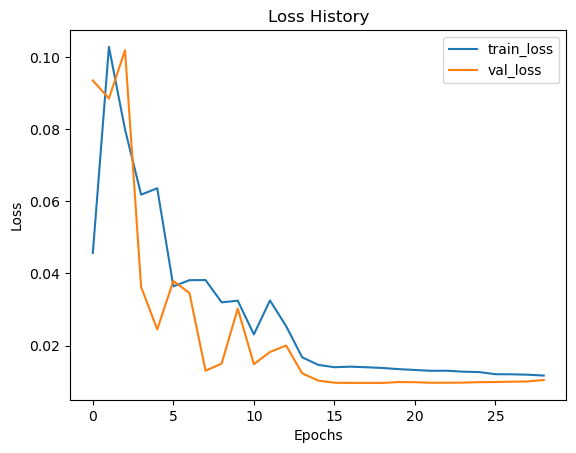

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

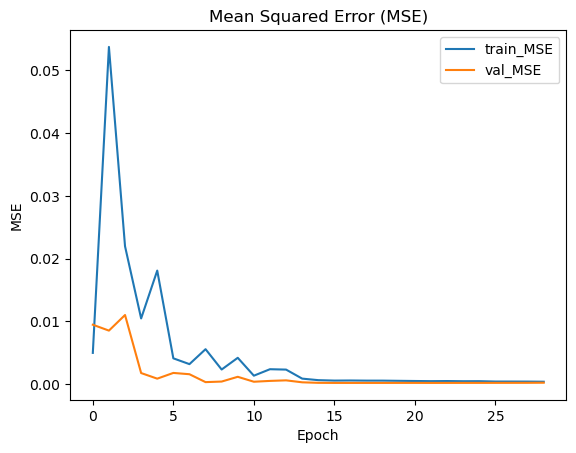

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

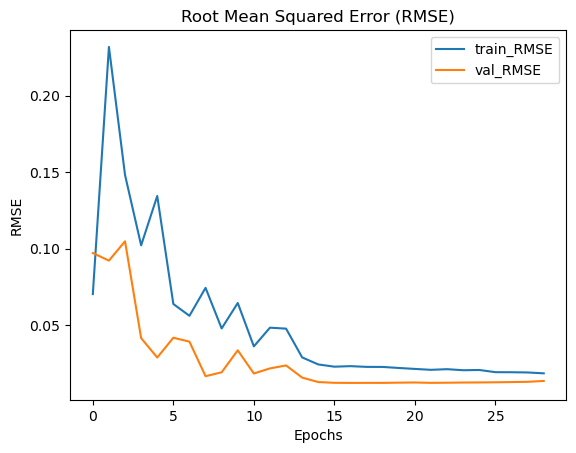

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

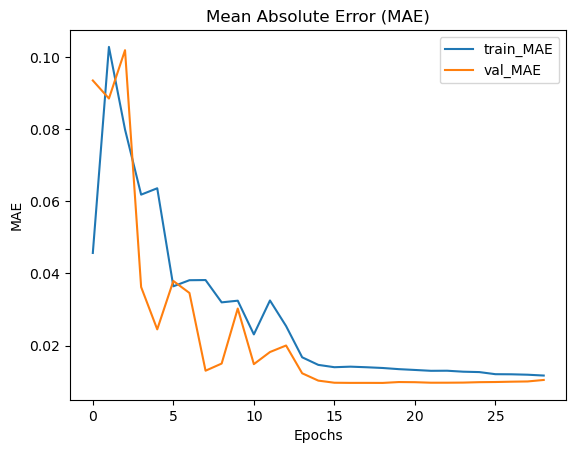

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

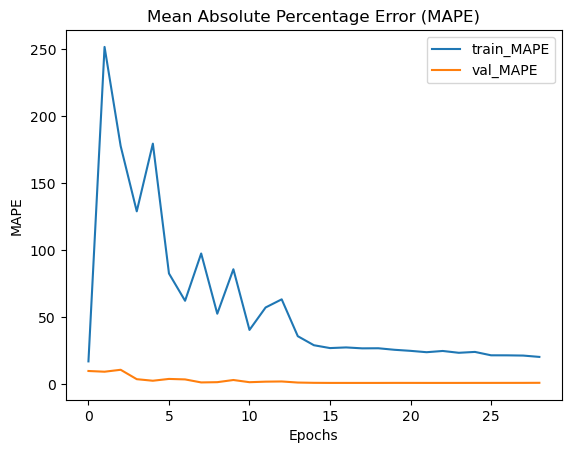

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:30:46.000984: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 5)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


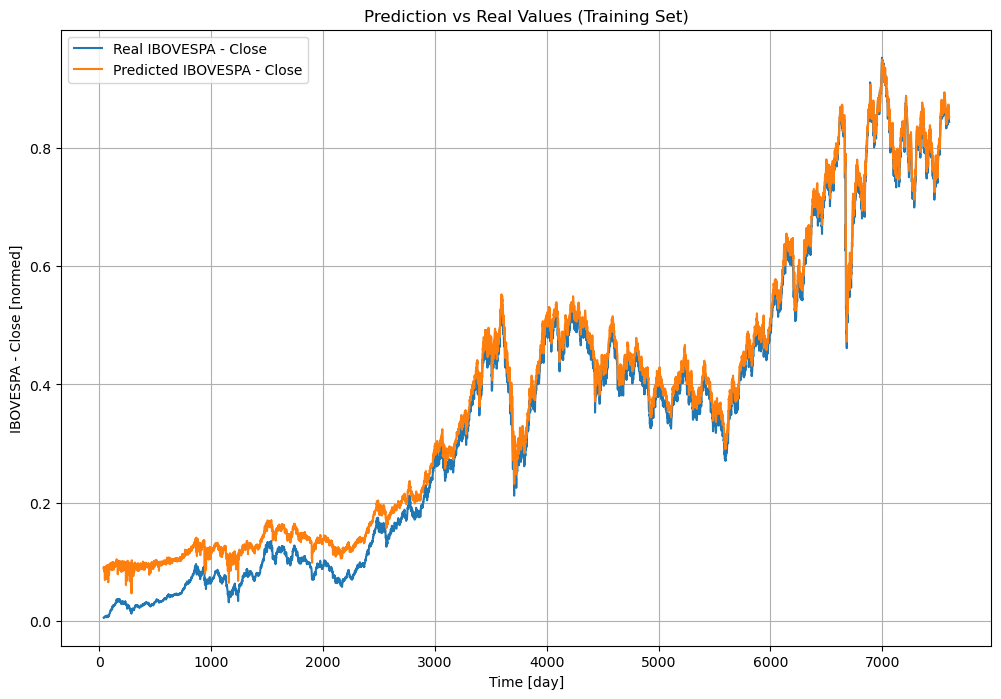

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 5)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


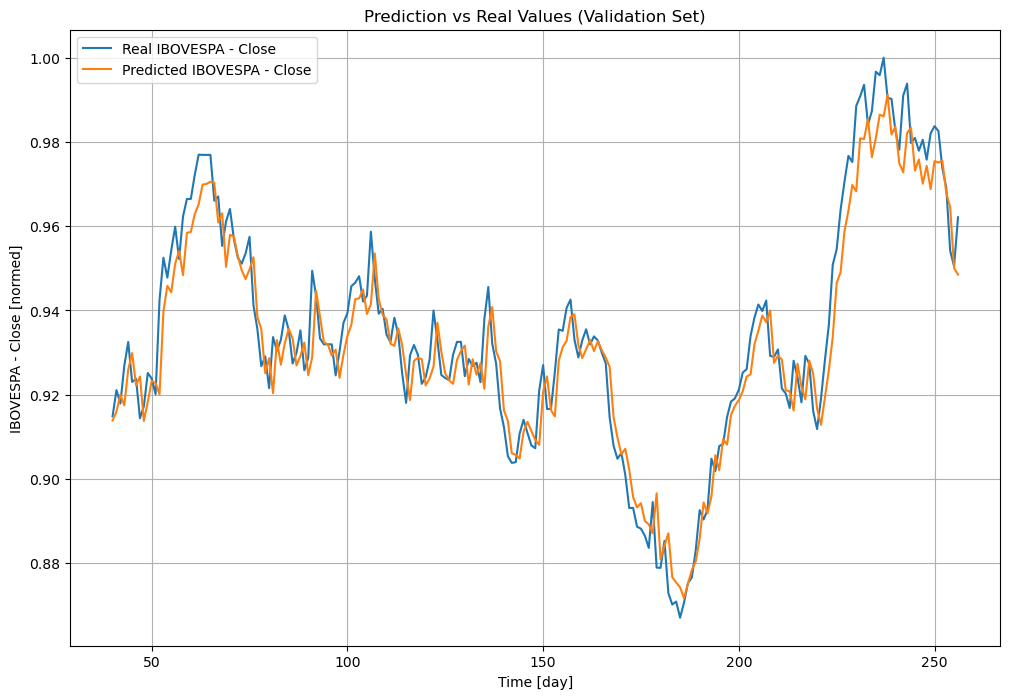

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 5)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


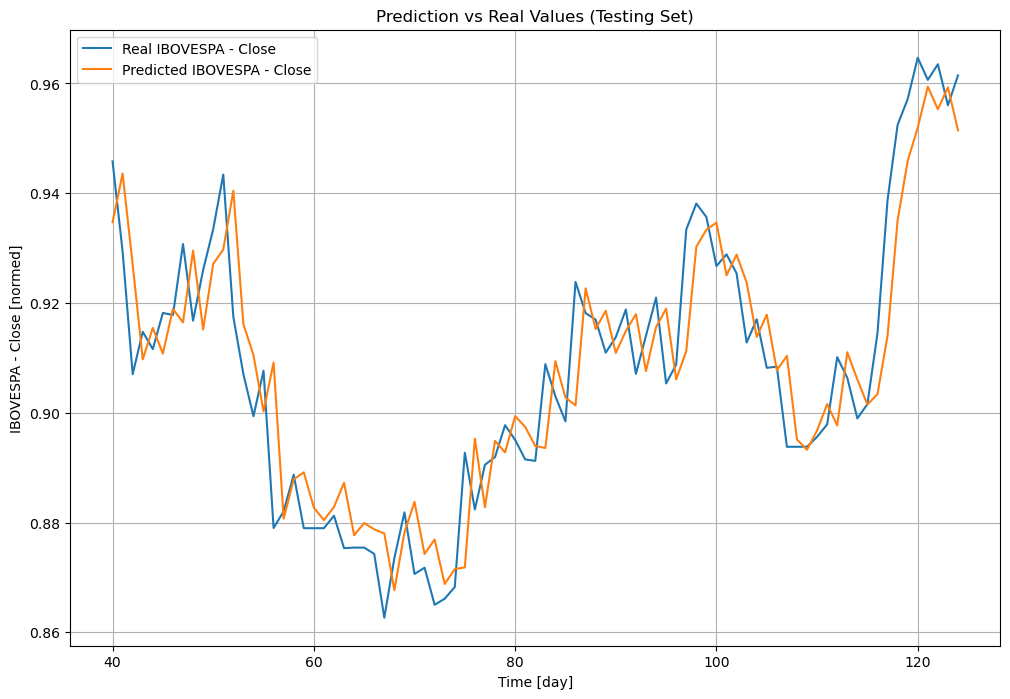

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

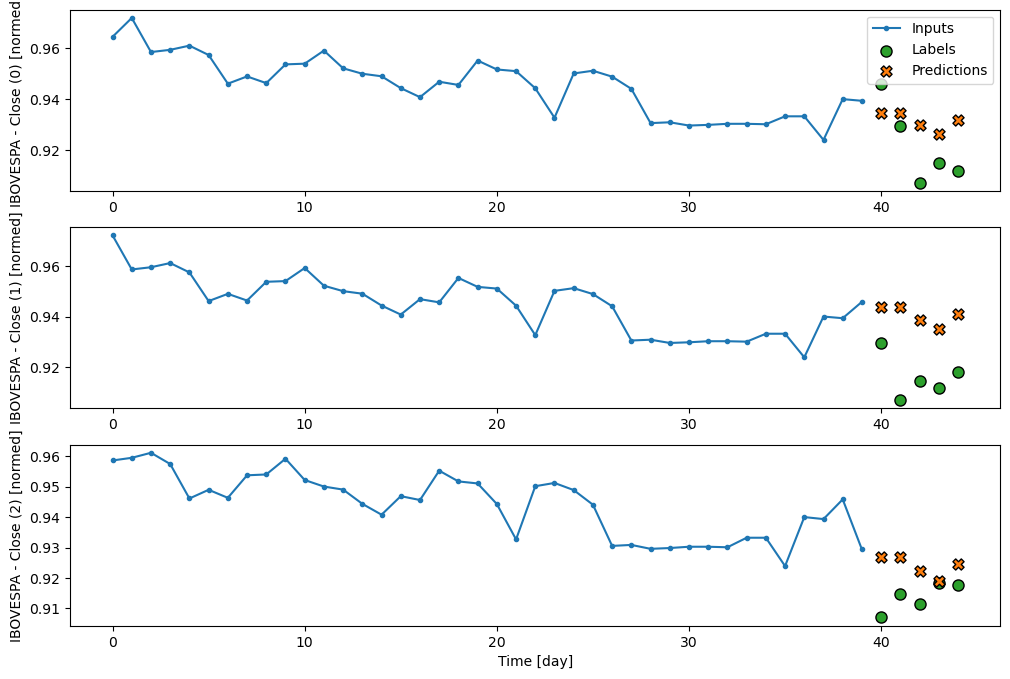

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:50s:969ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[[0.93470997, 0.93470997, 0.93470997, ..., 0.93470997,
         0.93470997, 0.93470997],
        [0.9345906 , 0.9345906 , 0.9345906 , ..., 0.9345906 ,
         0.9345906 , 0.9345906 ],
        [0.92961967, 0.92961967, 0.92961967, ..., 0.92961967,
         0.92961967, 0.92961967],
        [0.926363  , 0.926363  , 0.926363  , ..., 0.926363  ,
         0.926363  , 0.926363  ],
        [0.93195826, 0.93195826, 0.93195826, ..., 0.93195826,
         0.93195844, 0.93195844]],

       [[0.94358   , 0.94358   , 0.94358   , ..., 0.94358   ,
         0.94358   , 0.94358   ],
        [0.9436517 , 0.9436517 , 0.9436517 , ..., 0.9436517 ,
         0.9436517 , 0.9436517 ],
        [0.9386375 , 0.9386375 , 0.9386375 , ..., 0.9386375 ,
         0.9386375 , 0.9386375 ],
        [0.93524253, 0.93524253, 0.93524253, ..., 0.93524253,
         0.93524253, 0.93524253],
        [0.94091845, 0.94091845, 0.94091845, ..., 0.94091845,
         0.9409186 , 0.9409186 ]],

       [[0.9270029 , 0.9270029 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')